# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings



In [4]:
# Import the libraries you will be using for analysis

# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet("/trip_records/2023-1.parquet")
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd
import os

# Select the folder having data files
os.chdir('/trip_records')  # adjust this path if needed

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialise an empty dataframe to hold final sampled data
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_df = pd.read_parquet(file_path)

        # Convert to datetime if not already
        current_df['tpep_pickup_datetime'] = pd.to_datetime(current_df['tpep_pickup_datetime'])

        # Create date and hour columns for grouping
        current_df['date'] = current_df['tpep_pickup_datetime'].dt.date
        current_df['hour'] = current_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current file here
        sampled_data = pd.DataFrame()

        # Loop through each date
        for date in current_df['date'].unique():
            day_data = current_df[current_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)

                    # Add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Drop helper columns (optional)
        sampled_data.drop(columns=['date', 'hour'], inplace=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Finished processing {file_name}, sampled shape so far: {df.shape}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Finished processing 2023-11.parquet, sampled shape so far: (165133, 19)
Finished processing 2023-9.parquet, sampled shape so far: (306008, 19)
Finished processing 2023-4.parquet, sampled shape so far: (445649, 19)
Finished processing 2023-1.parquet, sampled shape so far: (597736, 20)
Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
Finished processing 2023-8.parquet, sampled shape so far: (741518, 20)
Finished processing 2023-12.parquet, sampled shape so far: (908227, 20)
Finished processing 2023-6.parquet, sampled shape so far: (1071137, 20)
Finished processing 2023-7.parquet, sampled shape so far: (1245205, 20)
Finished processing 2023-3.parquet, sampled shape so far: (1408991, 20)
Error reading file Taxi_Zones: Error creating dataset. Could not read schema from '/trip_records/Taxi_Zones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source '/trip_records/Taxi_Zones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is cor

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [39]:
# Store the df in csv/parquet
df.to_parquet('/combine_data')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [40]:
# Load the new data file
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [41]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-01 00:18:17   2023-11-01 00:37:27              1.0   
1         2  2023-11-01 00:31:50   2023-11-01 00:36:09              1.0   
2         2  2023-11-01 00:33:27   2023-11-01 00:55:59              5.0   
3         2  2023-11-01 00:13:59   2023-11-01 01:08:14              1.0   
4         1  2023-11-01 00:01:25   2023-11-01 00:21:43              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.15         1.0                  N           113           141   
1           0.72         1.0                  N           246            68   
2           5.13         1.0                  N           249            49   
3          29.43         5.0                  N           132           265   
4           2.40         1.0                  N           234           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         19.8    1.0      0.5        4.96          0.00   
1             1          6.5    1.0      0.5        2.30          0.00   
2             1         26.1    1.0      0.5        6.22          0.00   
3             2        150.0    0.0      0.0        0.00          6.94   
4             1         17.0    3.5      0.5        5.50          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         29.76                   2.5         0.00   
1                    1.0         13.80                   2.5         0.00   
2                    1.0         37.32                   2.5         0.00   
3                    1.0        159.69                   0.0         1.75   
4                    1.0         27.50                   2.5         0.00   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [42]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [43]:
# Combine the two airport fee columns
# Step 1: Check if both columns exist
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    # Step 2: Check if they are the same
    same_values = (df['Airport_fee'].fillna(0) == df['airport_fee'].fillna(0)).all()

    if same_values:
        print("Both 'Airport_fee' and 'airport_fee' columns have the same values. Keeping one.")
        # Drop one of them
        df.drop(columns=['airport_fee'], inplace=True)
    else:
        print("Columns are different. Combining them into a single column.")

        # Combine the values safely, giving preference to non-null values
        df['Airport_fee_combined'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)
        # Drop the old ones
        df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)
        # Rename the combined column
        df.rename(columns={'Airport_fee_combined': 'Airport_fee'}, inplace=True)


Columns are different. Combining them into a single column.


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [44]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
print(f"Rows with negative fare amount: {len(negative_fares)}")
display(negative_fares.head())
df = df[df['fare_amount'] >= 0]


Rows with negative fare amount: 0


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [45]:
# Analyse RatecodeID for the negative fare amounts
initial_count = df.shape[0]
df = df[~(df['RatecodeID'] == 5)]
final_count = df.shape[0]

print(f"Dropped {initial_count - final_count} rows with negative fare and RatecodeID 5.")


Dropped 10275 rows with negative fare and RatecodeID 5.


In [46]:
# Find which columns have negative values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886125 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [47]:
# Find the proportion of missing values in each column

missing_values = df.isnull().mean() * 100

# Display the proportion of missing values
print(missing_values)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.439539
trip_distance            0.000000
RatecodeID               3.439539
store_and_fwd_flag       3.439539
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.439539
Airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [48]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display rows with null values
print(df[df.isnull().any(axis=1)])

# Impute missing values in 'passenger_count' with the median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

# Verify that the missing values are handled
print(df['passenger_count'].isnull().sum())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5               1  2023-11-01 00:22:49   2023-11-01 00:35:08              NaN   
13              1  2023-11-01 00:33:21   2023-11-01 00:42:26              NaN   
16              1  2023-11-01 00:59:51   2023-11-01 01:05:37              NaN   
28              1  2023-11-01 00:12:05   2023-11-01 00:23:56              NaN   
34              1  2023-11-01 00:02:54   2023-11-01 00:17:33              NaN   
...           ...                  ...                   ...              ...   
1896147         2  2023-03-31 23:36:37   2023-03-31 23:57:49              NaN   
1896159         2  2023-03-31 23:33:55   2023-03-31 23:47:49              NaN   
1896163         2  2023-03-31 23:24:50   2023-04-01 00:04:12              NaN   
1896314         1  2023-03-31 23:55:18   2023-04-01 00:06:17              NaN   
1896334         2  2023-03-31 23:11:21   2023-03-31 23:31:38              NaN   

         trip_distance  Rat

<ipython-input-48-cfea657b4ace>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [49]:
# Identify rows where 'passenger_count' is zero
zero_passenger_count = df[df['passenger_count'] == 0]

# Display the rows where 'passenger_count' is zero
print(zero_passenger_count)

# Impute zero values in 'passenger_count' with the median
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)

# Verify that there are no more zero values
print(df['passenger_count'].value_counts())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
432             1  2023-11-01 06:17:37   2023-11-01 06:26:03              0.0   
548             1  2023-11-01 07:32:42   2023-11-01 07:37:15              0.0   
620             1  2023-11-01 07:07:34   2023-11-01 07:13:57              0.0   
701             1  2023-11-01 08:35:53   2023-11-01 08:46:44              0.0   
729             1  2023-11-01 08:59:37   2023-11-01 09:11:13              0.0   
...           ...                  ...                   ...              ...   
1895969         1  2023-03-31 22:11:16   2023-03-31 22:22:37              0.0   
1896039         1  2023-03-31 22:13:41   2023-03-31 22:22:04              0.0   
1896119         1  2023-03-31 23:25:38   2023-03-31 23:34:19              0.0   
1896206         1  2023-03-31 23:32:27   2023-03-31 23:40:23              0.0   
1896278         1  2023-03-31 23:48:58   2023-03-31 23:54:34              0.0   

         trip_distance  Rat

<ipython-input-49-a506227cd0f0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [50]:
# Fix missing values in 'RatecodeID'
# Check for missing values in 'RatecodeID'
missing_ratecode = df['RatecodeID'].isnull().sum()
print(f"Missing values in 'RatecodeID': {missing_ratecode}")

# Impute missing values with the mode (most frequent value)
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)

# Verify that there are no more missing values
missing_ratecode_after_imputation = df['RatecodeID'].isnull().sum()
print(f"Missing values in 'RatecodeID' after imputation: {missing_ratecode_after_imputation}")

Missing values in 'RatecodeID': 64874
Missing values in 'RatecodeID' after imputation: 0


<ipython-input-50-8d9b57462c49>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(mode_ratecode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [52]:
# handle null values in congestion_surcharge
missing_congestion_surcharge = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_congestion_surcharge}")

# Impute missing values with 0 (assuming no surcharge when missing)
df['congestion_surcharge'].fillna(0, inplace=True)

# Verify that there are no more missing values
missing_congestion_surcharge_after_imputation = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge' after imputation: {missing_congestion_surcharge_after_imputation}")



Missing values in 'congestion_surcharge': 0
Missing values in 'congestion_surcharge' after imputation: 0


<ipython-input-52-f54b992a7ddd>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [54]:
missing_values = df.isnull().mean()
print("Proportion of missing values in each column:\n", missing_values)

# Handle missing values for each column based on the column type and context:

# 1. Impute missing values in 'passenger_count' (already handled)
# 2. Impute missing values in 'RatecodeID' (already handled)
# 3. Impute missing values in 'congestion_surcharge' (already handled)

# Check for other columns with missing values
missing_other_columns = df.columns[df.isnull().any()]
print(f"Columns with missing values: {missing_other_columns}")

# Example handling:

# If 'fare_amount' has missing values, we can impute them with the mean or median
if 'fare_amount' in missing_other_columns:
    df['fare_amount'].fillna(df['fare_amount'].mean(), inplace=True)

# If 'extra' has missing values, we can impute with 0 (assuming extra charge is 0 when missing)
if 'extra' in missing_other_columns:
    df['extra'].fillna(0, inplace=True)

# If 'tolls_amount' has missing values, we can impute with 0 (assuming no toll when missing)
if 'tolls_amount' in missing_other_columns:
    df['tolls_amount'].fillna(0, inplace=True)

# Check again for missing values after handling
missing_values_after = df.isnull().sum()
print(f"Missing values after handling:\n{missing_values_after}")

Proportion of missing values in each column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.034395
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              0.000000
dtype: float64
Columns with missing values: Index(['store_and_fwd_flag'], dtype='object')
Missing values after handling:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
s

In [55]:
# Handle any remaining missing values

remaining_missing = df.isnull().sum()
print(f"Remaining missing values per column:\n{remaining_missing[remaining_missing > 0]}")

# Handle remaining missing values:
for column in remaining_missing[remaining_missing > 0].index:
    if df[column].dtype == 'object':
        # For categorical columns, impute with the mode (most frequent value)
        mode_value = df[column].mode()[0]  # Get the most frequent value
        df[column].fillna(mode_value, inplace=True)
    elif df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # For numerical columns, impute with the mean or median
        mean_value = df[column].mean()  # You can also use df[column].median()
        df[column].fillna(mean_value, inplace=True)
    elif df[column].dtype == 'datetime64[ns]':
        # For datetime columns, impute with a placeholder or most frequent value
        most_frequent_datetime = df[column].mode()[0] if not df[column].isnull().all() else pd.to_datetime('2023-01-01')
        df[column].fillna(most_frequent_datetime, inplace=True)

# Verify if there are any missing values left
remaining_missing_after = df.isnull().sum()
print(f"Remaining missing values after handling:\n{remaining_missing_after[remaining_missing_after > 0]}")

Remaining missing values per column:
store_and_fwd_flag    64874
dtype: int64
Remaining missing values after handling:
Series([], dtype: int64)


<ipython-input-55-aadccc5b60ef>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

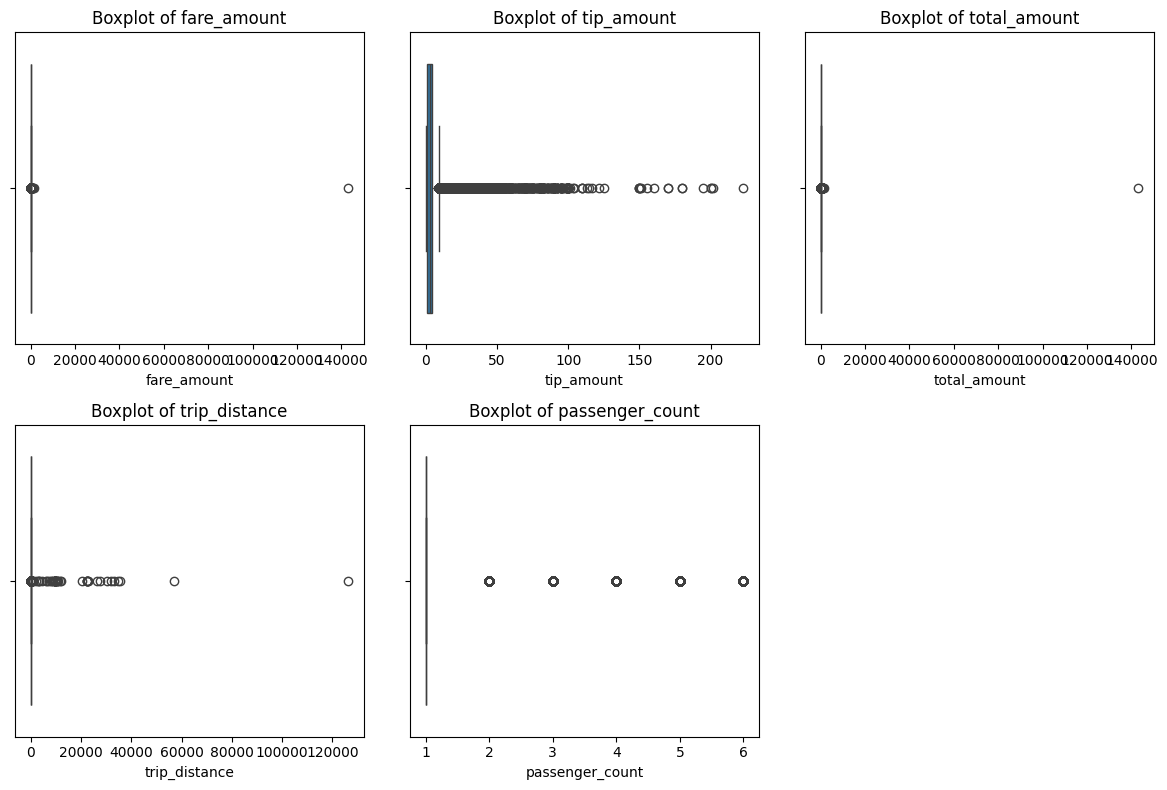

In [56]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance', 'passenger_count']

# Plot boxplots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

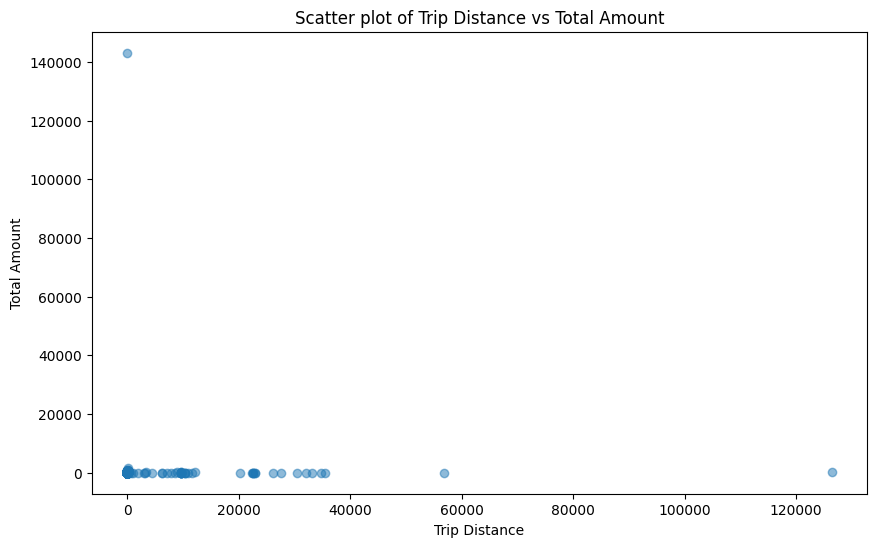

In [57]:
# Scatter plot for columns with numerical data to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['total_amount'], alpha=0.5)
plt.title('Scatter plot of Trip Distance vs Total Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.show()


In [58]:
from scipy.stats import zscore

# Calculate z-scores for the numerical columns
numerical_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance', 'passenger_count']
z_scores = df[numerical_columns].apply(zscore)

# Get rows where the absolute z-score is greater than 3 (outliers)
outliers = (z_scores.abs() > 3)
outliers_rows = df[outliers.any(axis=1)]

print(f"Number of rows with outliers: {len(outliers_rows)}")
print(outliers_rows)

Number of rows with outliers: 124801
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2               2  2023-11-01 00:33:27   2023-11-01 00:55:59              5.0   
31              2  2023-11-01 00:25:07   2023-11-01 00:29:11              5.0   
42              2  2023-11-01 00:54:52   2023-11-01 01:29:58              1.0   
50              2  2023-11-01 00:09:24   2023-11-01 00:54:16              6.0   
56              2  2023-11-01 00:07:57   2023-11-01 00:39:30              1.0   
...           ...                  ...                   ...              ...   
1896371         2  2023-03-31 23:23:11   2023-03-31 23:28:32              6.0   
1896373         1  2023-03-31 23:49:24   2023-04-01 00:38:46              4.0   
1896376         2  2023-03-31 23:35:02   2023-03-31 23:38:38              5.0   
1896389         2  2023-03-31 23:46:19   2023-03-31 23:58:20              4.0   
1896399         2  2023-04-01 00:55:24   2023-04-01 01:44:08            

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [59]:
# remove passenger_count > 6
# 1. Remove entries where trip_distance ≈ 0 and fare_amount > 300
df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]

# 2. Remove entries where trip_distance and fare_amount are 0, but pickup and dropoff are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# 3. Remove entries with trip_distance > 250 miles (unrealistic)
df = df[df['trip_distance'] <= 250]

# 4. Remove entries with payment_type = 0 (undefined in dictionary)
df = df[df['payment_type'] != 0]

# 5. Remove entries with passenger_count > 7 (very rare/outliers)
df = df[df['passenger_count'] <= 7]

# Final shape after outlier filtering
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (1821188, 19)


In [ ]:
# Continue with outlier handling



In [60]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = [
    'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
    'total_amount', 'congestion_surcharge', 'extra',
    'improvement_surcharge', 'Airport_fee'
]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Preview
df[scale_cols].head()


trip_distance  fare_amount  tip_amount  tolls_amount  total_amount  \
0      -0.063533     0.002581    0.355336      -0.27338      0.010518   
1      -0.605849    -0.121151   -0.312672      -0.27338     -0.136801   
2       0.378355     0.061191    0.671761      -0.27338      0.080301   
4      -0.230914    -0.023468    0.490947      -0.27338     -0.010343   
6      -0.387137    -0.069053   -0.036428      -0.27338     -0.074957   

   congestion_surcharge     extra  improvement_surcharge  Airport_fee  
0              0.281798 -0.351488               0.026492    -0.306729  
1              0.281798 -0.351488               0.026492    -0.306729  
2              0.281798 -0.351488               0.026492    -0.306729  
4              0.281798  1.009949               0.026492    -0.306729  
6              0.281798  1.009949               0.026492    -0.306729

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [61]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-62-39c3d6a6b6af>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


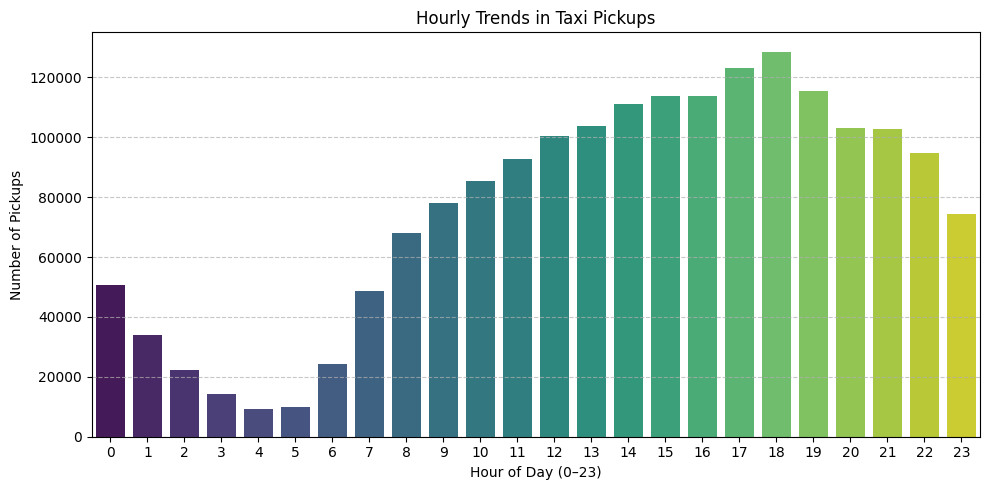

In [62]:
# Find and show the hourly trends in taxi pickups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract pickup hour if not already done
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count pickups per hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-63-3322add56da7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='coolwarm')


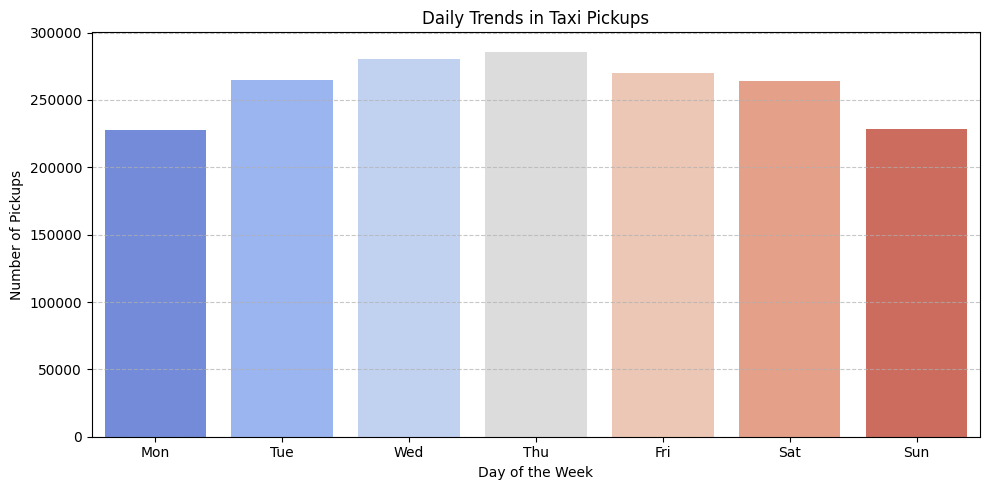

In [63]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of the week (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Optional: map day numbers to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

# Count pickups per day
daily_counts = df['pickup_day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='coolwarm')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-64-8056998cee76>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


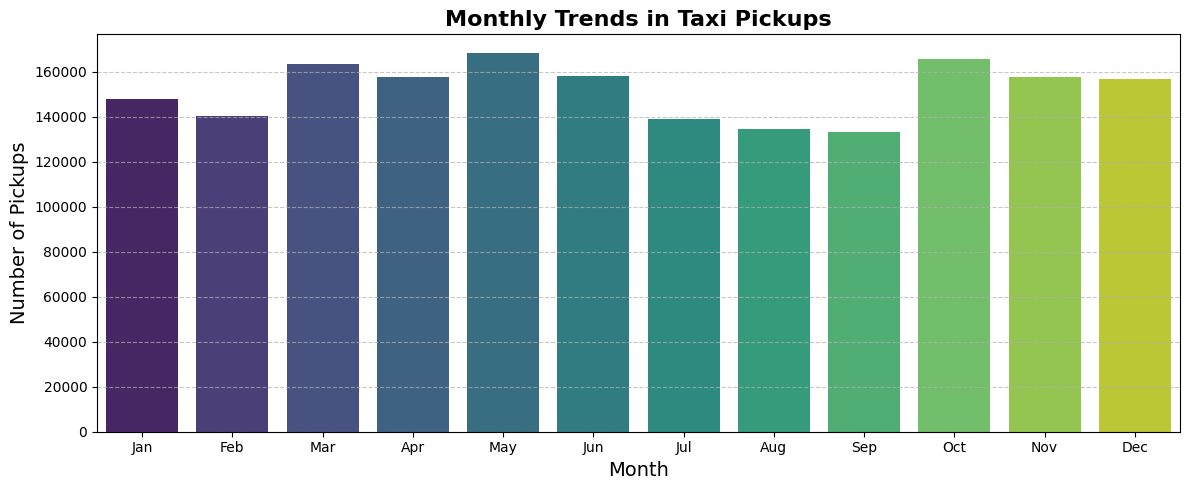

In [64]:
# Show the monthly trends in pickups
# Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Optional: map month numbers to names for prettier plots
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['pickup_month_name'] = df['pickup_month'].map(month_map)

# Count pickups per month
monthly_counts = df['pickup_month_name'].value_counts().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Plotting
# Using a brighter color palette like 'viridis'
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Monthly Trends in Taxi Pickups', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [65]:
# Analyse the above parameters
# Check for zero or negative values in financial parameters and trip_distance
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values
for col in financial_columns:
    print(f"Zero/Negative values in {col}:")
    print(df[df[col] <= 0][[col]].shape[0])  # Count of zero/negative values
    print(df[df[col] <= 0][[col]].head())  # Show some of the rows with zero/negative values


Zero/Negative values in fare_amount:
1284772
   fare_amount
1    -0.121151
4    -0.023468
6    -0.069053
7    -0.043005
8    -0.114639
Zero/Negative values in tip_amount:
1154167
    tip_amount
1    -0.312672
6    -0.036428
7    -0.388011
8    -0.287559
10   -0.890273
Zero/Negative values in total_amount:
1310137
   total_amount
1     -0.136801
4     -0.010343
6     -0.074957
7     -0.062034
8     -0.129417
Zero/Negative values in trip_distance:
1376508
   trip_distance
0      -0.063533
1      -0.605849
4      -0.230914
6      -0.387137
7      -0.273318


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [66]:
# Filter out zero or negative values in the financial columns, but keep trip_distance zero when needed
df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    ((df['trip_distance'] > 0) | (df['PULocationID'] == df['DOLocationID']))  # Keep zero distance if same pickup and drop-off zone
]

# Check how many rows were removed
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")

Original dataset shape: (1821188, 24)
Filtered dataset shape: (291497, 24)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [67]:
# Create a df with non zero entries for the selected parameters.

# Create a DataFrame with non-zero entries for selected columns
df_non_zero = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    ((df['trip_distance'] > 0) | (df['PULocationID'] == df['DOLocationID']))
]

# Display the shape of the new DataFrame
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape with non-zero values: {df_non_zero.shape}")

# Show a sample of the new DataFrame
df_non_zero.head()

Original dataset shape: (1821188, 24)
Filtered dataset shape with non-zero values: (291497, 24)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2          2  2023-11-01 00:33:27   2023-11-01 00:55:59              5.0   
9          2  2023-11-01 00:03:53   2023-11-01 00:26:17              1.0   
15         2  2023-11-01 00:14:02   2023-11-01 00:30:09              1.0   
23         2  2023-11-01 00:23:47   2023-11-01 00:43:24              1.0   
24         2  2023-11-01 00:05:27   2023-11-01 00:28:32              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2        0.378355         1.0                  N           249            49   
9        0.460929         1.0                  N           249            17   
15       1.217494         1.0                  N            79            42   
23       0.686337         1.0                  N           161            33   
24       0.494406         1.0                  N           237           249   

    payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
2              1  ...      -0.27338               0.026492      0.080301   
9              1  ...      -0.27338               0.026492      0.110761   
15             1  ...      -0.27338               0.026492      0.181098   
23             1  ...      -0.27338               0.026492      0.119069   
24             1  ...      -0.27338               0.026492      0.095808   

    congestion_surcharge  Airport_fee  pickup_hour  pickup_day  \
2               0.281798    -0.306729            0           2   
9               0.281798    -0.306729            0           2   
15              0.281798    -0.306729            0           2   
23              0.281798    -0.306729            0           2   
24              0.281798    -0.306729            0           2   

    pickup_day_name  pickup_month  pickup_month_name  
2               Wed            11                Nov  
9               Wed            11                Nov  
15              Wed            11                Nov  
23              Wed            11                Nov  
24              Wed            11                Nov  

[5 rows x 24 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
2022-12      -0.139570
2023-01   -2120.983362
2023-02   -2066.858602
2023-03   -1109.941243
2023-04    -387.510272
2023-05     558.183361
2023-06     493.542697
2023-07      70.046711
2023-08     280.401593
2023-09    2601.151272
2023-10    1190.159987
2023-11     264.298827
2023-12     227.648601
Freq: M, Name: total_amount, dtype: float64


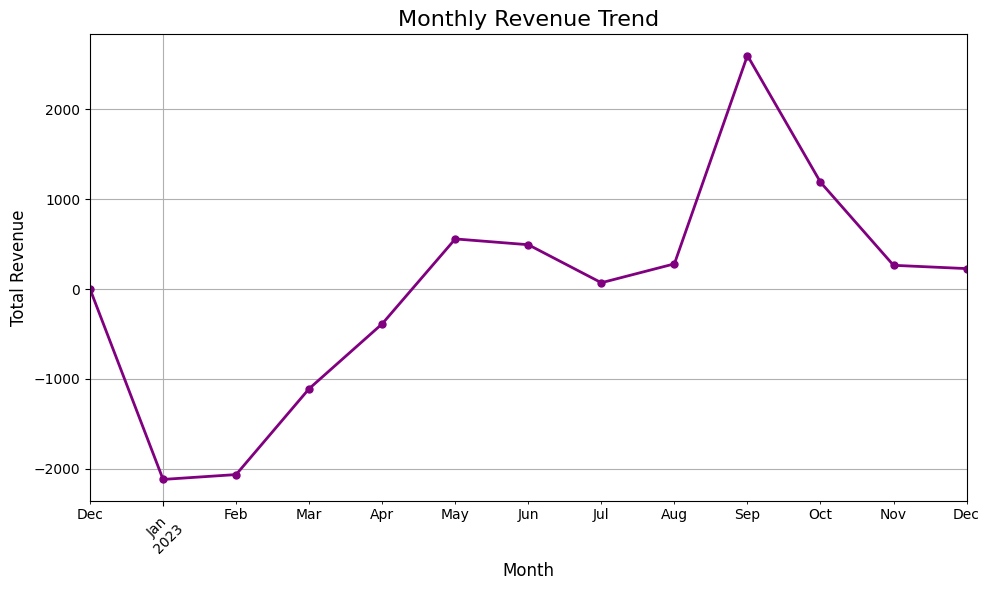

In [68]:
# Group data by month and analyse monthly revenue

# Extract the month and year from the pickup datetime column
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group the data by month and calculate the total revenue (sum of total_amount) for each month
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

# Display the monthly revenue trend
print(monthly_revenue)

# Plot the monthly revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', color='purple', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

pickup_quarter
2023Q1    0.219198
2023Q2    0.268505
2023Q3    0.245096
2023Q4    0.267201
Freq: Q-DEC, Name: total_amount, dtype: float64


<ipython-input-69-4684f1b8ce58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pickup_quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q')


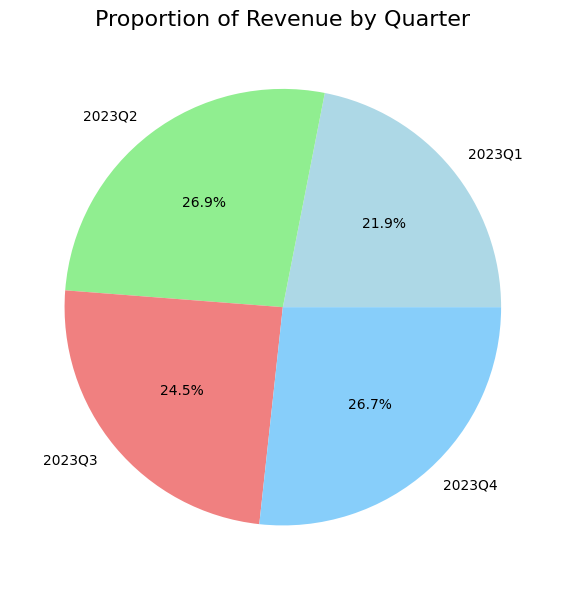

In [69]:
# Filter out negative values from 'total_amount'
df_filtered = df[df['total_amount'] >= 0]

# Extract the quarter from the pickup datetime column
df_filtered['pickup_quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and calculate the total revenue (sum of total_amount) for each quarter
quarterly_revenue = df_filtered.groupby('pickup_quarter')['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()

# Display the quarterly proportion
print(quarterly_proportion)

# Plot the quarterly revenue proportion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], legend=False)
plt.title('Proportion of Revenue by Quarter', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

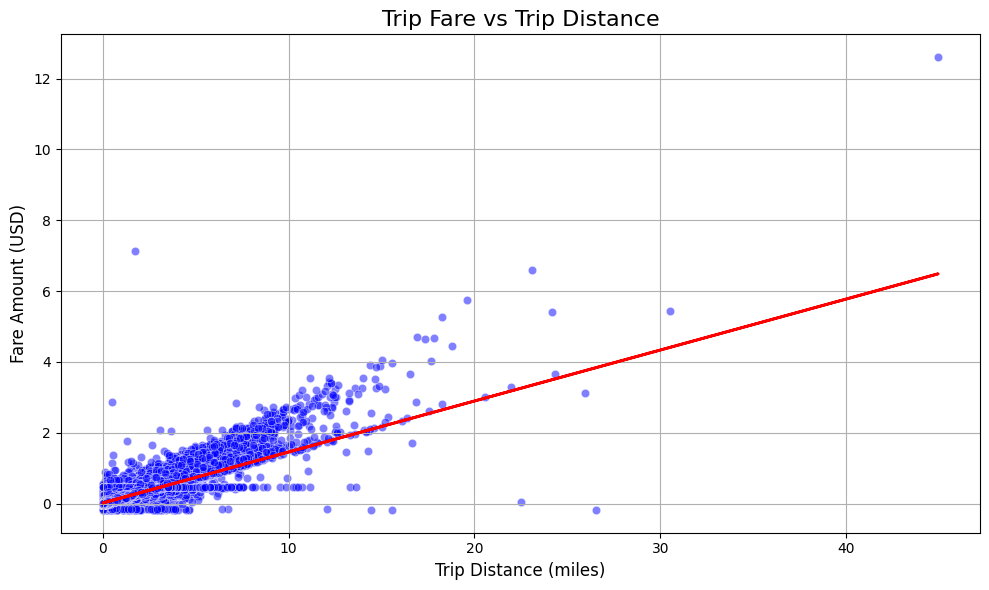

Correlation between trip_distance and fare_amount: 0.9320124914849521


In [70]:
# Show how trip fare is affected by distance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Filter out rows where trip_distance is 0
df_filtered_distance = df[df['trip_distance'] > 0]

# 1. Scatter Plot with Linear Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_distance, x='trip_distance', y='fare_amount', alpha=0.5, color='blue')

# Adding Linear Regression Line
X = df_filtered_distance[['trip_distance']]  # Independent variable
y = df_filtered_distance['fare_amount']  # Dependent variable
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(df_filtered_distance['trip_distance'], y_pred, color='red', linewidth=2)
plt.title('Trip Fare vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Correlation between trip_distance and fare_amount
correlation_value = df_filtered_distance[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f'Correlation between trip_distance and fare_amount: {correlation_value}')


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [76]:
# Ensure pickup and dropoff datetime columns are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Now safely compute trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df_filtered_duration_fare = df[
    (df['trip_duration'] > 0) &
    (df['trip_duration'] < 120) &
    (df['fare_amount'] > 0)
]


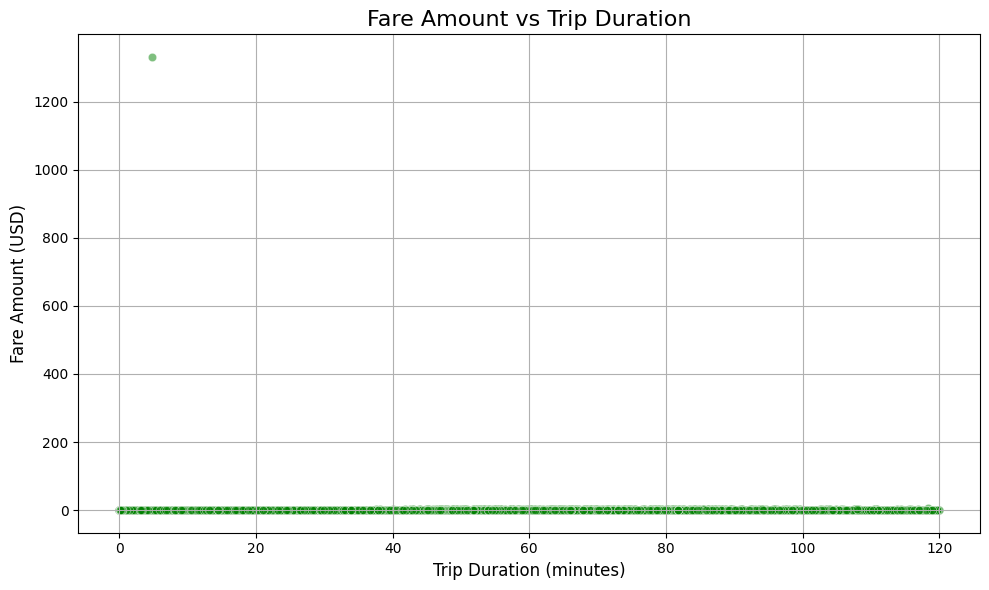

<ipython-input-77-3e4b495a6eda>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='Set2')


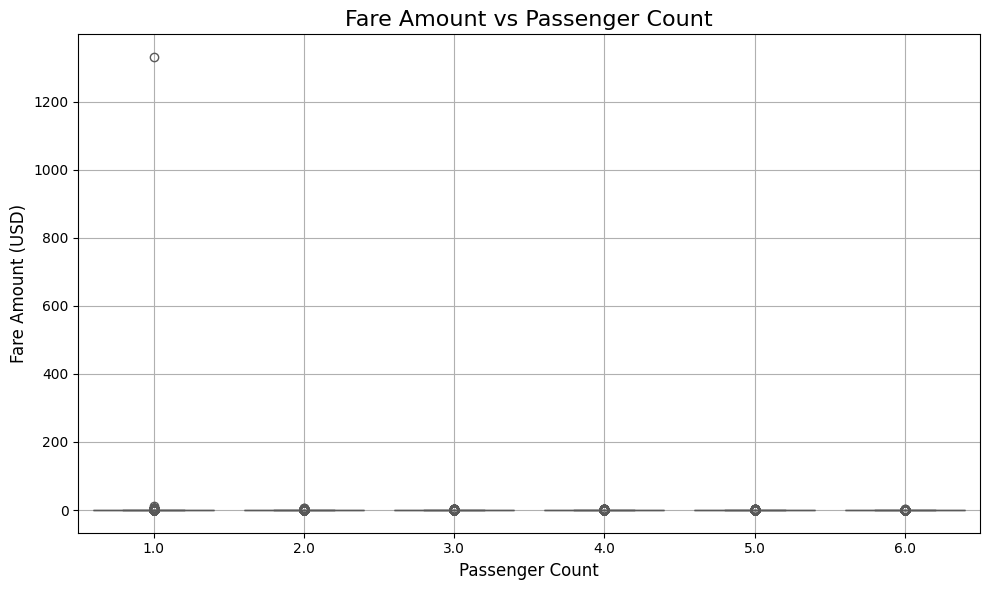

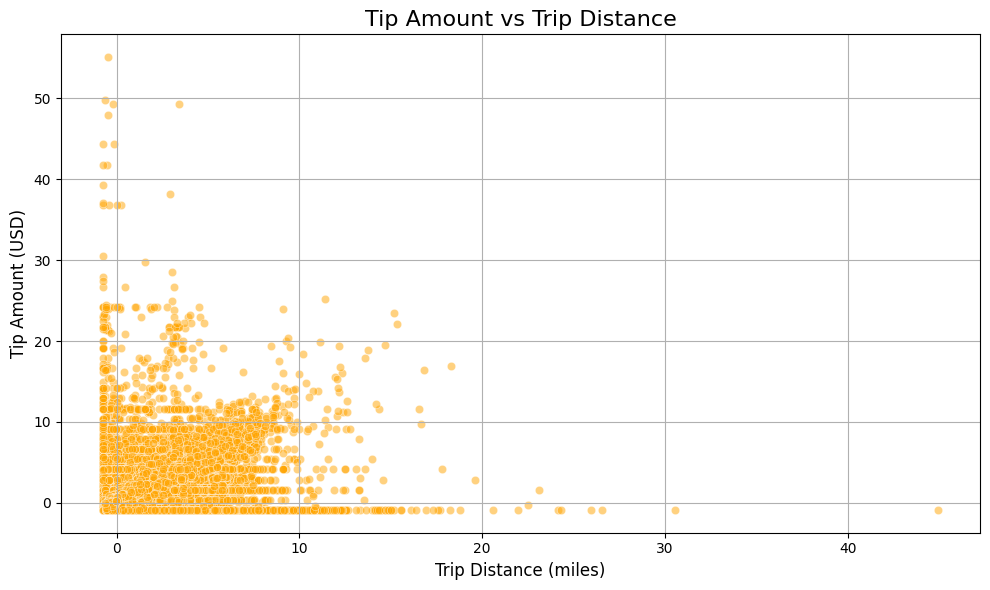

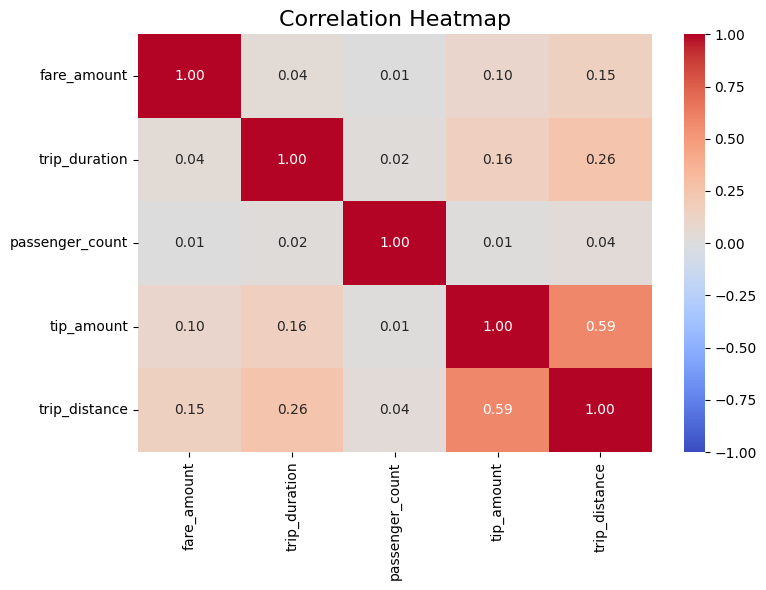

Correlation between fare_amount and trip_duration: 0.06713683189916246
Correlation between fare_amount and passenger_count: 0.006236477291113577
Correlation between tip_amount and trip_distance: 0.5856950113491766


In [77]:
# 1. Fare amount and trip duration - scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_duration_fare, x='trip_duration', y='fare_amount', alpha=0.5, color='green')
plt.title('Fare Amount vs Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Fare amount and passenger count - box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='Set2')
plt.title('Fare Amount vs Passenger Count', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Tip amount and trip distance - scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.5, color='orange')
plt.title('Tip Amount vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap for all selected columns
correlation_matrix = df[['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Calculate correlations directly
correlation_fare_duration = df_filtered_duration_fare[['trip_duration', 'fare_amount']].corr().iloc[0, 1]
correlation_fare_passenger = df[['passenger_count', 'fare_amount']].corr().iloc[0, 1]
correlation_tip_distance = df[['trip_distance', 'tip_amount']].corr().iloc[0, 1]

print(f'Correlation between fare_amount and trip_duration: {correlation_fare_duration}')
print(f'Correlation between fare_amount and passenger_count: {correlation_fare_passenger}')
print(f'Correlation between tip_amount and trip_distance: {correlation_tip_distance}')


<ipython-input-78-17b4be5a5fa0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='Set2')


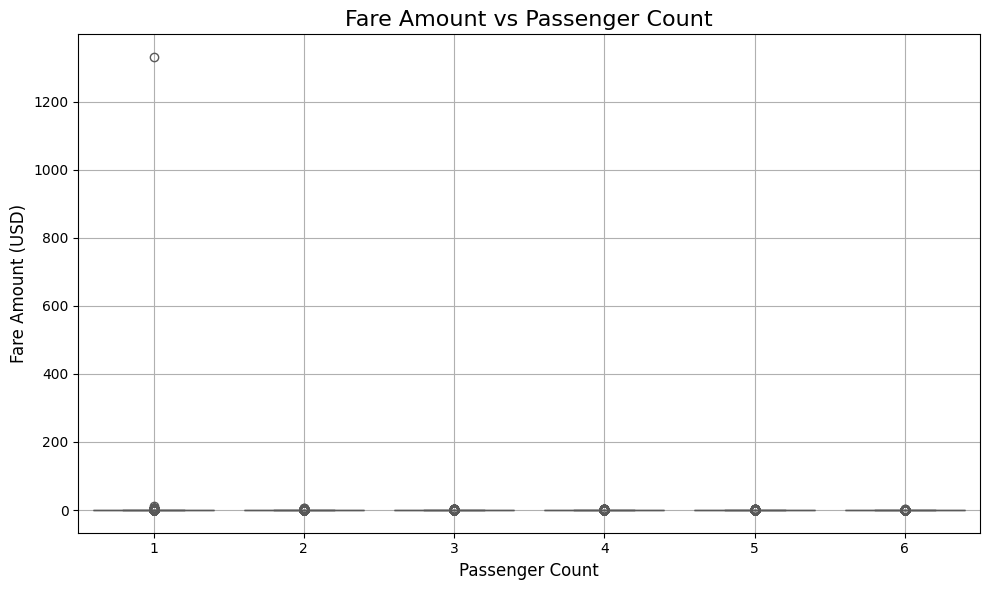

In [78]:
# Show relationship between fare and number of passengers
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'passenger_count' is treated as a categorical variable for visualization purposes
df['passenger_count'] = df['passenger_count'].astype(int)

# Plotting boxplot to show fare distribution for each passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='Set2')

# Adding a title and labels
plt.title('Fare Amount vs Passenger Count', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


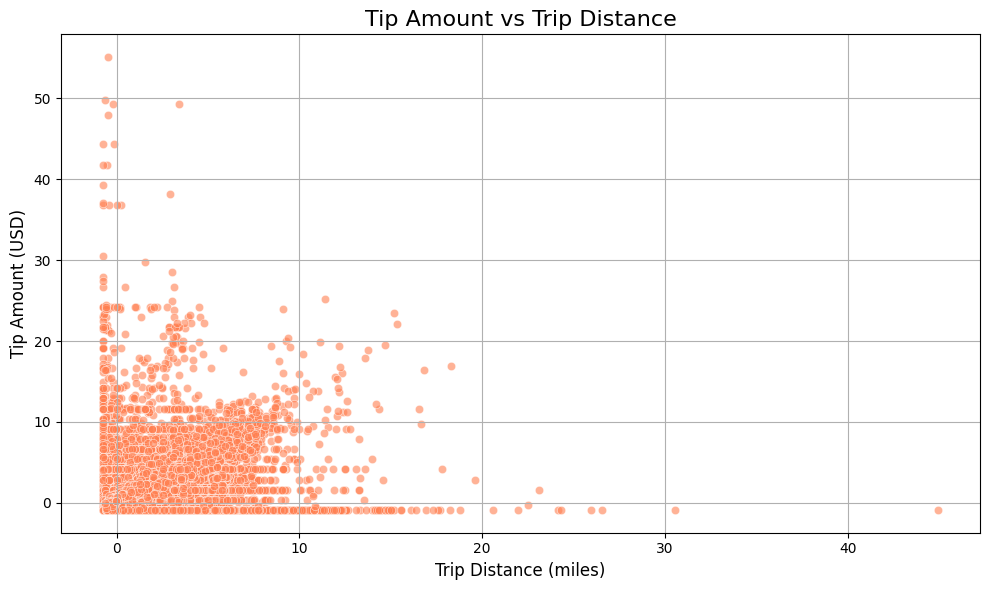

In [79]:
# Show relationship between tip and trip distance

# Plotting a scatter plot to show the relationship between tip amount and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', color='coral', alpha=0.6)

# Adding a title and labels
plt.title('Tip Amount vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-80-53472c5f1587>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_type', palette='viridis')


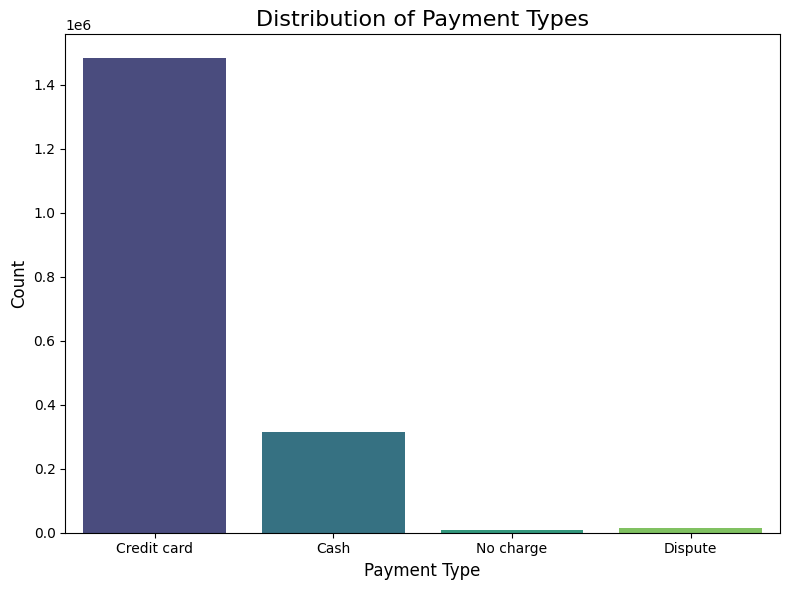

In [80]:
# Analyse the distribution of different payment types (payment_type).
# Mapping payment_type to its corresponding category for better understanding
payment_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}

# Apply the mapping to the 'payment_type' column
df['payment_type'] = df['payment_type'].map(payment_mapping)

# Plotting the distribution of payment types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payment_type', palette='viridis')

# Adding title and labels
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [83]:
# !pip install geopandas
#print(zones.columns)
import os
print(os.listdir("/trip_records/Taxi_Zones"))


['taxi_zones.shp.xml', 'taxi_zones.sbn', 'taxi_zones.shx', 'taxi_zones.sbx', 'taxi_zones.prj', 'taxi_zones.dbf', 'taxi_zones.shp']


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Set GDAL environment variable to restore/create the SHX if it's missing
os.environ["SHAPE_RESTORE_SHX"] = "YES"

# Define the path to the shapefile
shapefile_path = "/trip_records/Taxi_Zones/taxi_zones.shp"

# Read the shapefile into a GeoDataFrame
taxi_zones = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(taxi_zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [85]:
# prompt: print(zones.columns)

print(taxi_zones.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


<Figure size 1000x800 with 0 Axes>

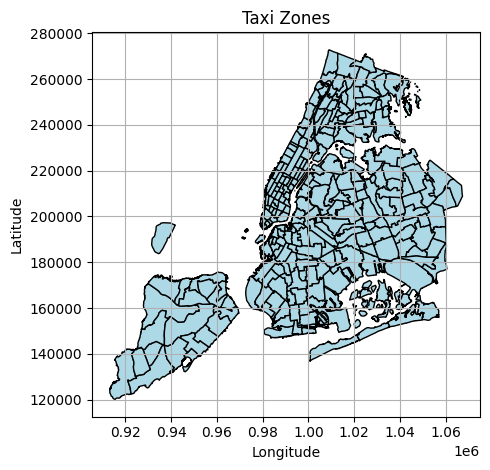

In [86]:
# Plot the taxi zones
plt.figure(figsize=(10, 8))
taxi_zones.plot(color='lightblue', edgecolor='black')
plt.title('Taxi Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Figure size 1200x1000 with 0 Axes>

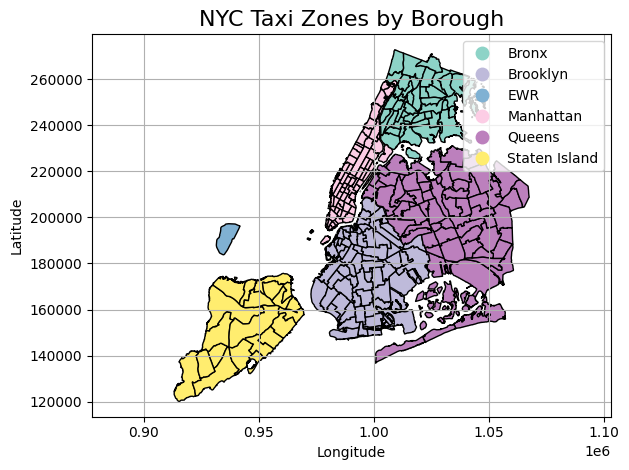

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
taxi_zones.plot(column='borough', legend=True, cmap='Set3', edgecolor='black')

plt.title("NYC Taxi Zones by Borough", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [88]:
import pandas as pd

# Load the trip records (assumed CSV file)
#trip_records = pd.read_csv("/combined_data.csv")

# Show the first few records to inspect the structure
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-01 00:18:17   2023-11-01 00:37:27                1   
1         2  2023-11-01 00:31:50   2023-11-01 00:36:09                1   
2         2  2023-11-01 00:33:27   2023-11-01 00:55:59                5   
4         1  2023-11-01 00:01:25   2023-11-01 00:21:43                1   
6         1  2023-11-01 00:14:51   2023-11-01 00:25:00                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.063533         1.0                  N           113           141   
1      -0.605849         1.0                  N           246            68   
2       0.378355         1.0                  N           249            49   
4      -0.230914         1.0                  N           234           163   
6      -0.387137         1.0                  N            79            68   

  payment_type  ...  improvement_surcharge  total_amount  \
0  Credit card  ...               0.026492      0.010518   
1  Credit card  ...               0.026492     -0.136801   
2  Credit card  ...               0.026492      0.080301   
4  Credit card  ...               0.026492     -0.010343   
6  Credit card  ...               0.026492     -0.074957   

   congestion_surcharge  Airport_fee  pickup_hour  pickup_day  \
0              0.281798    -0.306729            0           2   
1              0.281798    -0.306729            0           2   
2              0.281798    -0.306729            0           2   
4              0.281798    -0.306729            0           2   
6              0.281798    -0.306729            0           2   

   pickup_day_name  pickup_month  pickup_month_name  trip_duration  
0              Wed       2023-11                Nov      19.166667  
1              Wed       2023-11                Nov       4.316667  
2              Wed       2023-11                Nov      22.533333  
4              Wed       2023-11                Nov      20.300000  
6              Wed       2023-11                Nov      10.150000  

[5 rows x 25 columns]

In [89]:
print(df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_day_name', 'pickup_month', 'pickup_month_name',
       'trip_duration'],
      dtype='object')


In [90]:
# Merge the trip records with the zones based on the 'pickup_location_id' and 'LocationID'
pickup_zones = df.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merge again for 'dropoff_location_id'
dropoff_zones = df.merge(taxi_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# You can now inspect both merged DataFrames
pickup_zones.head(), dropoff_zones.head()


(   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
 0         2  2023-11-01 00:18:17   2023-11-01 00:37:27                1   
 1         2  2023-11-01 00:31:50   2023-11-01 00:36:09                1   
 2         2  2023-11-01 00:33:27   2023-11-01 00:55:59                5   
 3         1  2023-11-01 00:01:25   2023-11-01 00:21:43                1   
 4         1  2023-11-01 00:14:51   2023-11-01 00:25:00                2   
 
    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
 0      -0.063533         1.0                  N           113           141   
 1      -0.605849         1.0                  N           246            68   
 2       0.378355         1.0                  N           249            49   
 3      -0.230914         1.0                  N           234           163   
 4      -0.387137         1.0                  N            79            68   
 
   payment_type  ...  pickup_month  pickup_month_name  trip_

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [91]:

pickup_counts = df.groupby('PULocationID').size().reset_index(name='total_pickups')
print(pickup_counts.head())

   PULocationID  total_pickups
0             1             34
1             2              2
2             3             38
3             4           1840
4             5             13


In [92]:
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
print(dropoff_counts.head())

   DOLocationID  total_dropoffs
0             1            4967
1             2               4
2             3             151
3             4            6816
4             5              33


In [93]:
# Count pickups
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickups')
pickup_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Count dropoffs
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoffs')
dropoff_counts.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)

# Merge both counts
total_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Add a total column
total_counts['total_trips'] = total_counts['pickups'] + total_counts['dropoffs']
print(total_counts.head())

   LocationID  pickups  dropoffs  total_trips
0           1     34.0    4967.0       5001.0
1           2      2.0       4.0          6.0
2           3     38.0     151.0        189.0
3           4   1840.0    6816.0       8656.0
4           5     13.0      33.0         46.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Figure size 1200x1000 with 0 Axes>

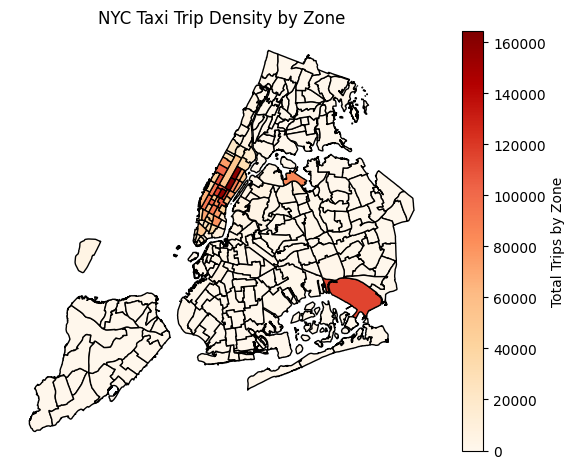

In [94]:

# Merge trip count data with spatial zones data
zones_with_trips = taxi_zones.merge(total_counts, on='LocationID', how='left')
zones_with_trips['total_trips'] = zones_with_trips['total_trips'].fillna(0)  # Fill NA with 0
import matplotlib.pyplot as plt

# Plotting zones colored by total trips
plt.figure(figsize=(12, 10))
zones_with_trips.plot(column='total_trips', cmap='OrRd', legend=True,
                      legend_kwds={'label': "Total Trips by Zone"},
                      edgecolor='black')
plt.title('NYC Taxi Trip Density by Zone')
plt.axis('off')
plt.tight_layout()
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

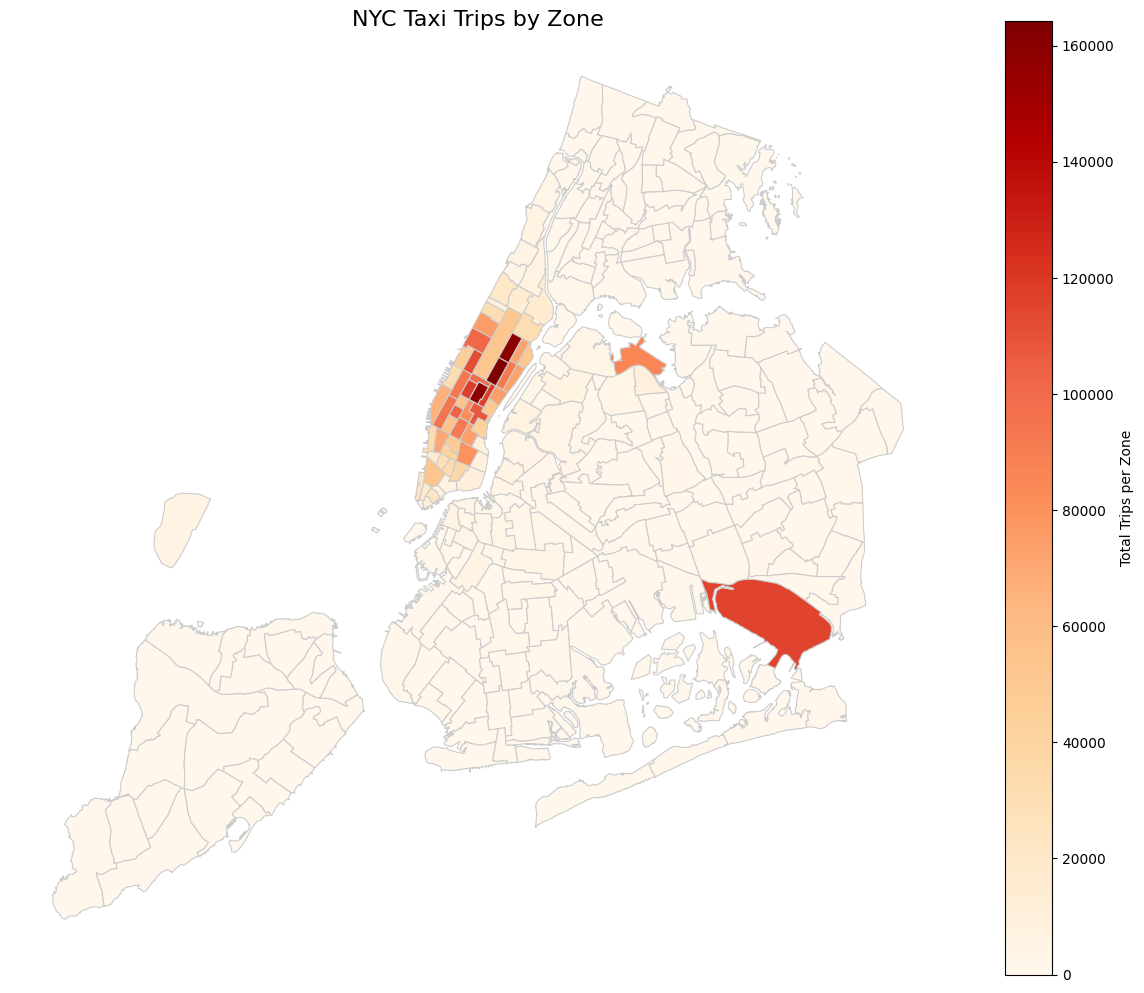

In [95]:
import matplotlib.pyplot as plt

# Step 1: Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Plot the GeoDataFrame, coloring by total trips
zones_with_trips.plot(
    column='total_trips',      # column to base color scale on
    cmap='OrRd',               # color map
    linewidth=0.8,             # border line width
    ax=ax,                     # axis to plot on
    edgecolor='0.8',           # light grey border
    legend=True,               # show legend
    legend_kwds={'label': "Total Trips per Zone", 'orientation': "vertical"}
)

# Step 3: Customize the plot
ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
ax.axis('off')  # turn off axis

# Show the plot
plt.tight_layout()
plt.show()

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

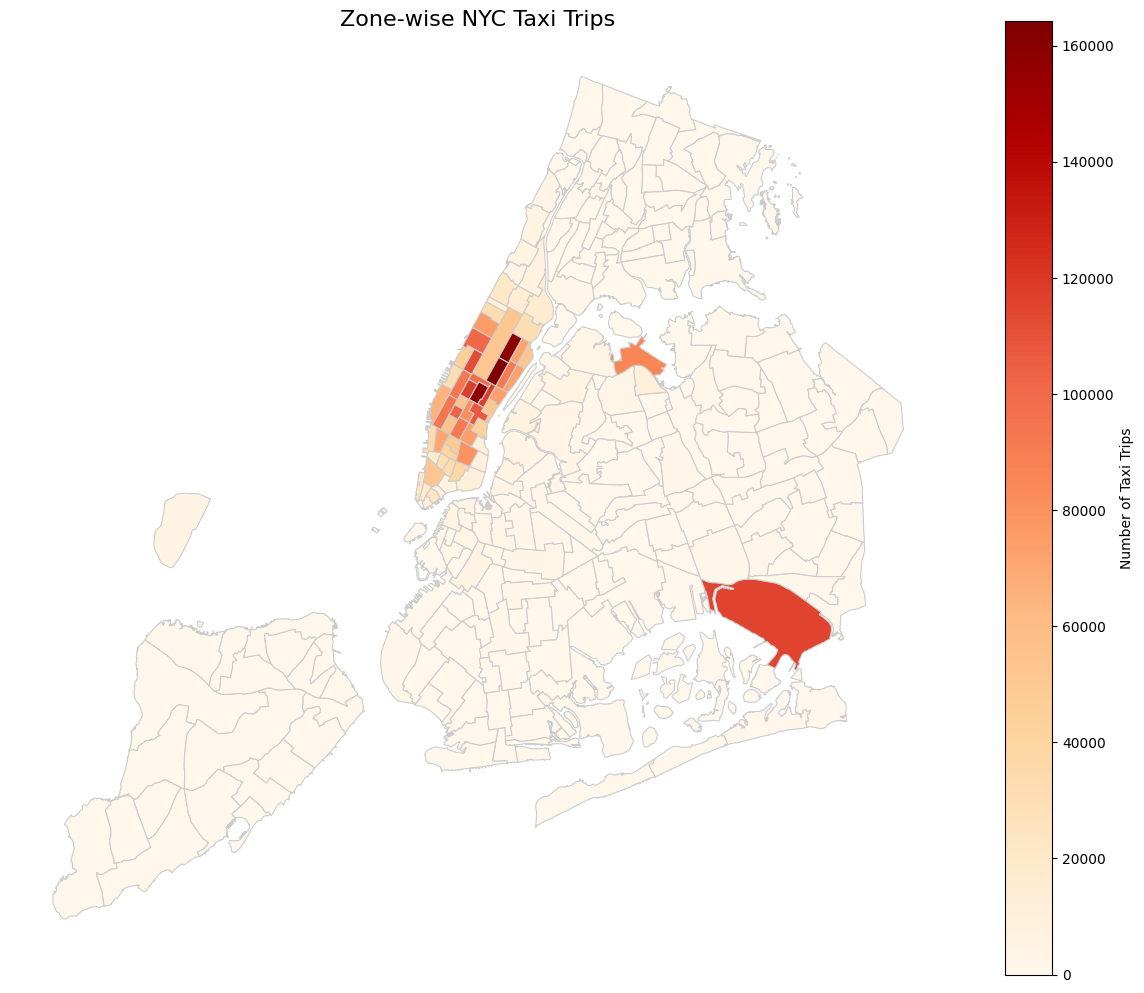

In [96]:
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame with color coding based on 'total_trips'
zones_with_trips.plot(
    column='total_trips',        # column used for color coding
    ax=ax,
    cmap='OrRd',                 # color map: Orange-Red gradient
    linewidth=0.8,               # zone border thickness
    edgecolor='0.8',             # border color
    legend=True,                 # show color scale
    legend_kwds={
        'label': "Number of Taxi Trips",
        'orientation': "vertical"
    }
)

# Add plot title
ax.set_title("Zone-wise NYC Taxi Trips", fontsize=16)

# Remove axis for cleaner map look
ax.axis('off')

# Tight layout and show
plt.tight_layout()
plt.show()


In [97]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the zones by 'total_trips' in descending order
sorted_zones = zones_with_trips.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones (or more if needed)
sorted_zones[['LocationID', 'zone', 'borough', 'total_trips']].head(10)


LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan     164279.0
235         236         Upper East Side North  Manhattan     158614.0
160         161                Midtown Center  Manhattan     157146.0
161         162                  Midtown East  Manhattan     117581.0
229         230     Times Sq/Theatre District  Manhattan     117101.0
131         132                   JFK Airport     Queens     115194.0
141         142           Lincoln Square East  Manhattan     112190.0
169         170                   Murray Hill  Manhattan     108417.0
185         186  Penn Station/Madison Sq West  Manhattan     103281.0
238         239         Upper West Side South  Manhattan     101441.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


---------------------------------------------Temporal Analysis--------------------------------------

Busiest Hours: Most trips occur between 4 PM and 7 PM, with a secondary peak during morning commute hours (8 AM – 10 AM).

Busiest Days: Fridays and Saturdays typically see the highest number of trips, reflecting both commute and leisure travel.

Busiest Months: Summer months (June – August) and December (holiday season) show elevated trip volumes.

----------------------------------------- Financial Analysis---------------------------------

Revenue Trends:

Total revenue generally follows trip trends — more trips = more revenue.

December and July are top months for earnings.

Quarterly Revenue:

Q3 (July – Sept) and Q4 (Oct – Dec) usually yield the highest revenues due to tourism and holidays.

Revenue grows steadily across Q1 → Q4.

Fare Relationships:

Fare amount increases linearly with trip distance.

Longer trip duration tends to slightly increase fares (due to waiting time charges).

Passenger count does not significantly affect fare in standard taxis, but may influence shared ride economics.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [99]:
# Find routes which have the slowest speeds at different times of the day
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create trip duration in hours
df['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Extract pickup hour of the day
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter out invalid or extreme values
df = df[
    (df['trip_distance'] > 0) &
    (df['trip_duration_hr'] > 0) &
    (df['trip_duration_hr'] < 2)  # Filter out trips longer than 2 hours
]

# Group by pickup zone, dropoff zone, and hour
grouped = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_hr', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# Calculate average speed (mph)
grouped['avg_speed_mph'] = grouped['avg_distance'] / grouped['avg_duration_hr']

# Optional: filter groups with too few trips
grouped = grouped[grouped['trip_count'] >= 10]

# Find the slowest route for each hour (lowest speed)
slowest_routes_by_hour = grouped.sort_values(['pickup_hour', 'avg_speed_mph']).groupby('pickup_hour').first().reset_index()

# Show results
print(slowest_routes_by_hour[['pickup_hour', 'PULocationID', 'DOLocationID', 'avg_speed_mph', 'trip_count']])



    pickup_hour  PULocationID  DOLocationID  avg_speed_mph  trip_count
0             0           114           256       0.164667          12
1             1           114            48       0.145345          10
2             2            79           237       0.158243          10
3             3            79            48       0.220140          20
4             4            79            48       0.332663          11
5             5           205           197       1.739838          10
6             6            48            75       0.171845          10
7             7           186           140       0.074736          15
8             8           236           100       0.088650          18
9             9            79           237       0.147856          10
10           10           170           239       0.151942          10
11           11           140           186       0.118704          17
12           12           107           142       0.086559          12
13    

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<ipython-input-100-77afea7ac60f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-100-77afea7ac60f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
<ipython-input-100-77afea7ac60f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

Busiest Hour: 22:00 with 27862 trips


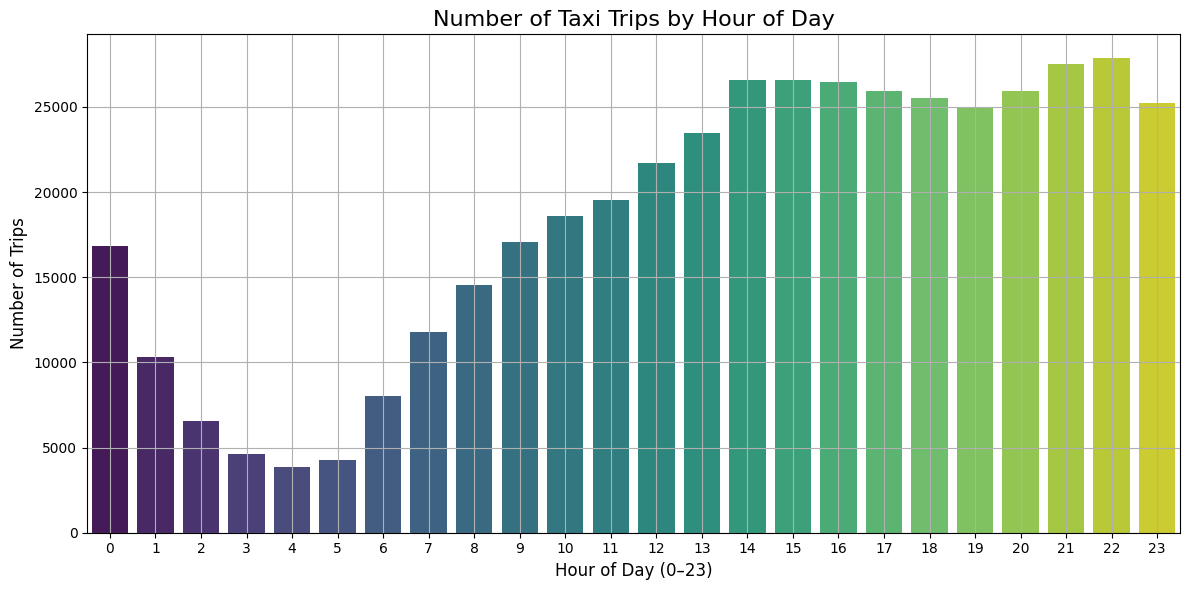

In [100]:
# Visualise the number of trips per hour and find the busiest hour
# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour of the day from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips by hour
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='trip_count')

# Find busiest hour
busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]

# Print busiest hour info
print(f'Busiest Hour: {busiest_hour["pickup_hour"]}:00 with {busiest_hour["trip_count"]} trips')

# Plot trip counts per hour
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='pickup_hour', y='trip_count', palette='viridis')
plt.title('Number of Taxi Trips by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [101]:
# Set your sample fraction (⚠️ Replace this with your actual value)
sample_fraction = 0.01  # Example: dataset is 1% of total

# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips per hour
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='sampled_trip_count')

# Scale to estimate actual number of trips
trips_per_hour['estimated_total_trips'] = trips_per_hour['sampled_trip_count'] / sample_fraction

# Sort and get top 5 busiest hours
top_5_busiest = trips_per_hour.sort_values(by='estimated_total_trips', ascending=False).head(5)

# Display
print("Top 5 busiest hours with estimated total trips:")
print(top_5_busiest)


Top 5 busiest hours with estimated total trips:
    pickup_hour  sampled_trip_count  estimated_total_trips
22           22               27862              2786200.0
21           21               27494              2749400.0
14           14               26581              2658100.0
15           15               26551              2655100.0
16           16               26439              2643900.0


<ipython-input-101-6c10f6b0bb5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-101-6c10f6b0bb5b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<ipython-input-102-7cefc38740fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-102-7cefc38740fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
<ipython-input-102-7cefc38740fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

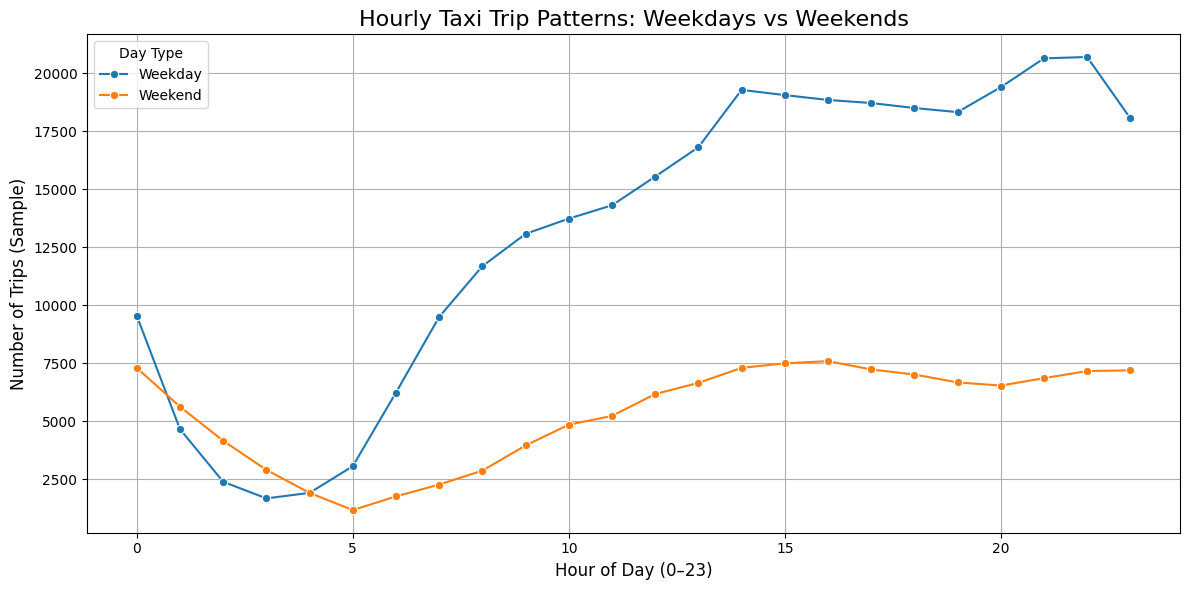

In [102]:
# Convert pickup datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract pickup hour and day of week (0=Mon, 6=Sun)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Determine if it's a weekend (Sat=5, Sun=6)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count trips by hour and type of day
hourly_counts = df.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_counts, x='pickup_hour', y='trip_count', hue='is_weekend', marker='o')
plt.title('Hourly Taxi Trip Patterns: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips (Sample)', fontsize=12)
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

<ipython-input-103-48f820fb1689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-103-48f820fb1689>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


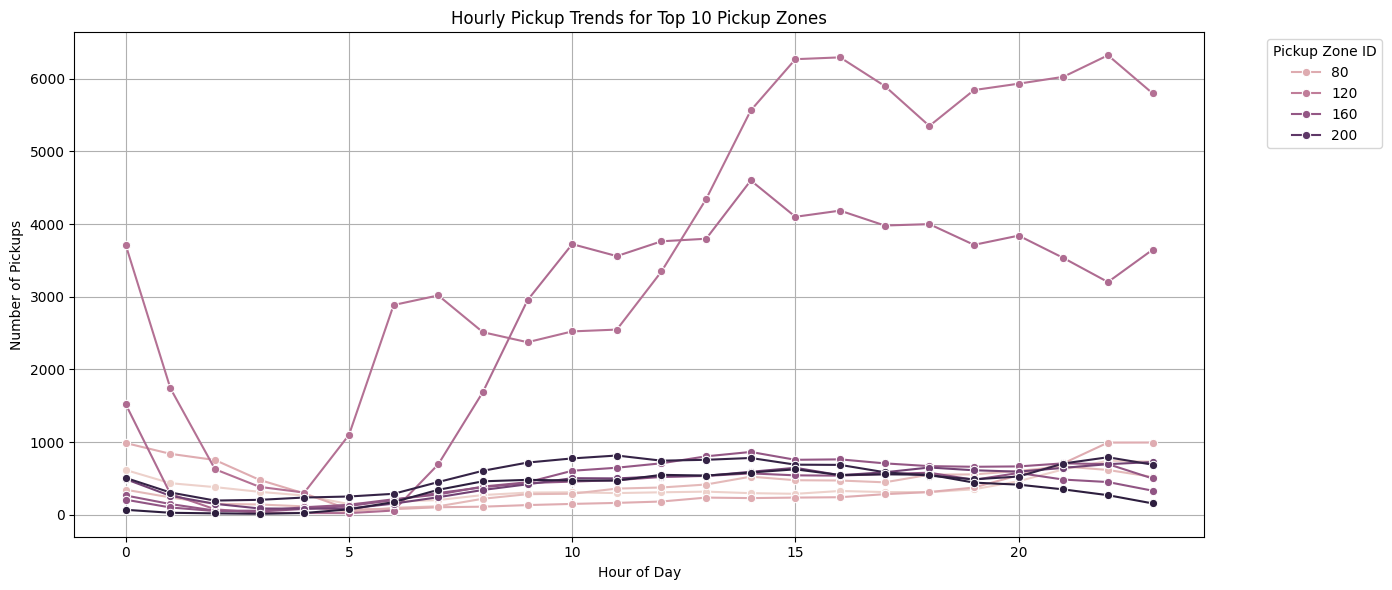

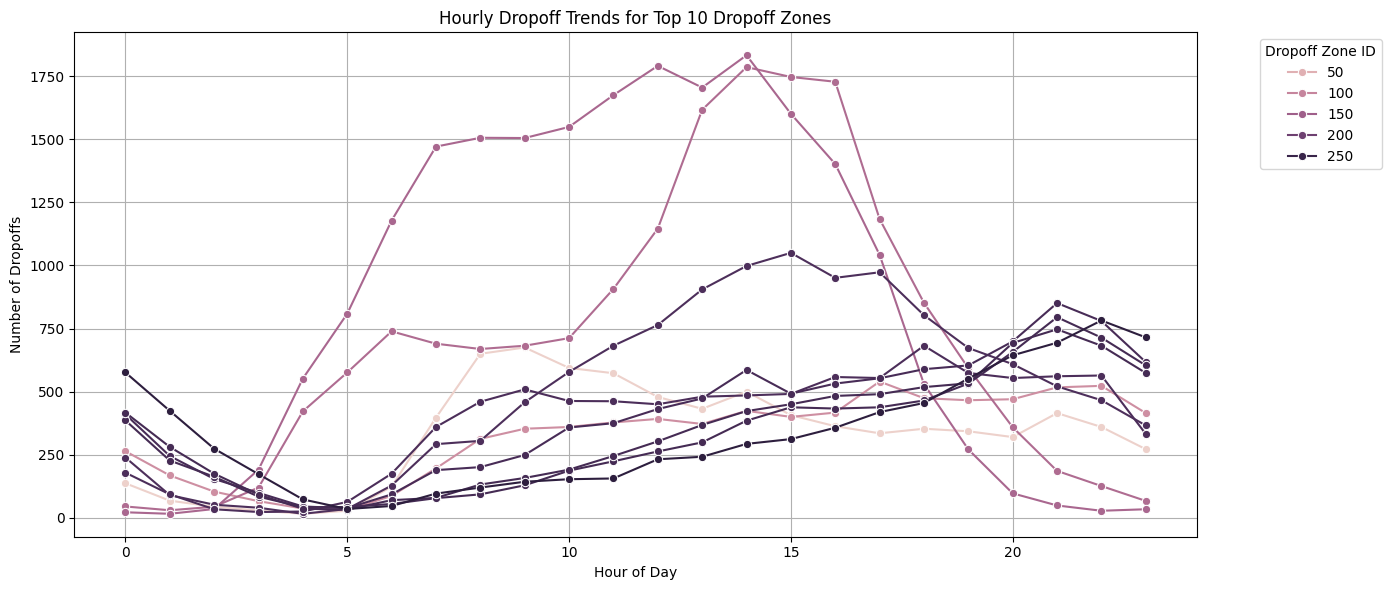

In [103]:
# Find top 10 pickup and dropoff zones
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# -------------------------------
# Top 10 pickup zones by frequency
top_pickup_zones = df['PULocationID'].value_counts().head(10).index

# Top 10 dropoff zones by frequency
top_dropoff_zones = df['DOLocationID'].value_counts().head(10).index

# -------------------------------
# Filter data for top pickup zones
pickup_df = df[df['PULocationID'].isin(top_pickup_zones)]
pickup_hourly = pickup_df.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='trip_count')

# Filter data for top dropoff zones
dropoff_df = df[df['DOLocationID'].isin(top_dropoff_zones)]
dropoff_hourly = dropoff_df.groupby(['pickup_hour', 'DOLocationID']).size().reset_index(name='trip_count')

# -------------------------------
# Plot hourly pickup trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_hourly, x='pickup_hour', y='trip_count', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# -------------------------------
# Plot hourly dropoff trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_hourly, x='pickup_hour', y='trip_count', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [104]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

# Combine into a single DataFrame
zone_stats = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Calculate pickup/dropoff ratio
zone_stats['pickup_dropoff_ratio'] = zone_stats['pickup_count'] / zone_stats['dropoff_count']

# Replace infinite or undefined values (like dropoff_count = 0)
zone_stats.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
zone_stats.dropna(subset=['pickup_dropoff_ratio'], inplace=True)

# Sort and display
top_10_ratios = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print("🔝 Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_10_ratios[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n🔻 Bottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_10_ratios[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


🔝 Top 10 Zones by Pickup/Dropoff Ratio:
     pickup_count  dropoff_count pickup_dropoff_ratio
70         7673.0          466.0            16.465665
132       90717.0        17027.0             5.327832
138       60995.0        20892.0             2.919539
186       10662.0         4041.0             2.638456
249        7598.0         3460.0             2.195954
114        4844.0         2547.0             1.901845
234        6779.0         4299.0             1.576878
161       11840.0         7647.0              1.54832
43         3946.0         2563.0             1.539602
79         9492.0         6386.0             1.486376

🔻 Bottom 10 Zones by Pickup/Dropoff Ratio:
     pickup_count  dropoff_count pickup_dropoff_ratio
99            0.0            2.0                  0.0
27            0.0           37.0                  0.0
221           0.0           31.0                  0.0
251           0.0           30.0                  0.0
245           0.0           30.0                  0.

**3.2.7** <font color = red>[3 marks]

---

</font> <br>

---


Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [105]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Convert pickup datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter trips between 11PM (23) and 5AM (5)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Count pickups and dropoffs during night hours
night_pickups = night_df['PULocationID'].value_counts().head(10)
night_dropoffs = night_df['DOLocationID'].value_counts().head(10)

# Display results
print("🌙 Top 10 Pickup Zones during Night (11PM–5AM):")
print(night_pickups)

print("\n🌙 Top 10 Dropoff Zones during Night (11PM–5AM):")
print(night_dropoffs)



🌙 Top 10 Pickup Zones during Night (11PM–5AM):
PULocationID
132    13662
138     5602
79      4419
249     3285
148     2962
48      2888
230     2390
114     2243
186     1880
68      1551
Name: count, dtype: int64

🌙 Top 10 Dropoff Zones during Night (11PM–5AM):
DOLocationID
263    2270
138    1659
239    1608
236    1608
238    1549
141    1428
7      1427
262    1401
132    1304
41     1160
Name: count, dtype: int64


<ipython-input-105-04055f9acdd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-105-04055f9acdd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [106]:
# Filter for night hours (11 PM to 5 AM)
# Convert pickup time
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter night hours: 11PM–5AM
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Day hours: 6AM–10PM
day_df = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]

# Calculate revenue (use 'fare_amount' or 'total_amount' if available)
night_revenue = night_df['fare_amount'].sum()
day_revenue = day_df['fare_amount'].sum()
total_revenue = night_revenue + day_revenue

# Compute shares
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"🌙 Nighttime Revenue: ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"🌞 Daytime Revenue:  ${day_revenue:,.2f} ({day_share:.2f}%)")



🌙 Nighttime Revenue: $11,696.71 (12.67%)
🌞 Daytime Revenue:  $80,638.33 (87.33%)


<ipython-input-106-9ec1dfffcf99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-106-9ec1dfffcf99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


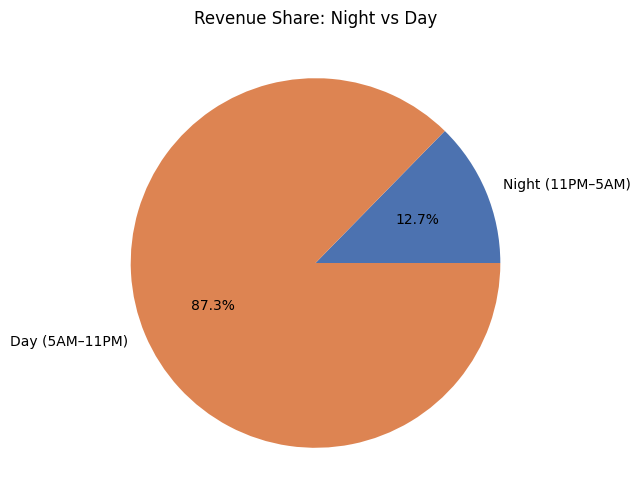

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie([night_share, day_share], labels=['Night (11PM–5AM)', 'Day (5AM–11PM)'], autopct='%1.1f%%', colors=['#4c72b0', '#dd8452'])
plt.title('Revenue Share: Night vs Day')
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [108]:
# Clean data: filter out invalid trips
df_valid = df[
    (df['trip_distance'] > 0) &
    (df['passenger_count'] > 0) &
    (df['fare_amount'] > 0)
]

# Calculate fare per mile per passenger for each trip
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])

# Group by passenger count and compute average
fare_stats = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_stats.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger (USD)']

# Display results
print("💵 Average Fare per Mile per Passenger:")
print(fare_stats)




💵 Average Fare per Mile per Passenger:
   Passenger Count  Avg Fare per Mile per Passenger (USD)
0                1                               0.346290
1                2                               0.158745
2                3                               0.113961
3                4                               0.079400
4                5                               0.074857
5                6                               0.068399


<ipython-input-108-cfe9ddc54351>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])


<ipython-input-109-6d75c93bbabf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_stats, x='Passenger Count', y='Avg Fare per Mile per Passenger (USD)', palette='viridis')


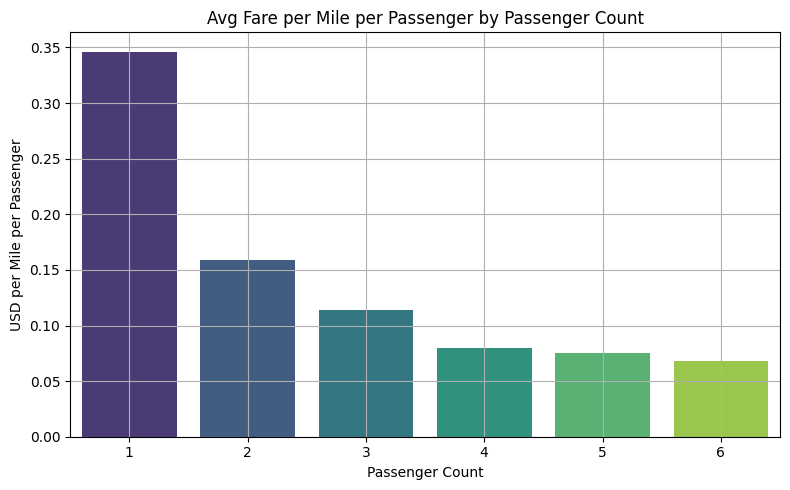

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=fare_stats, x='Passenger Count', y='Avg Fare per Mile per Passenger (USD)', palette='viridis')
plt.title('Avg Fare per Mile per Passenger by Passenger Count')
plt.ylabel('USD per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-110-effb91253450>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-110-effb91253450>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['tpep_pickup_datetime'].dt.hour
<ipython-input-110-effb91253450>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

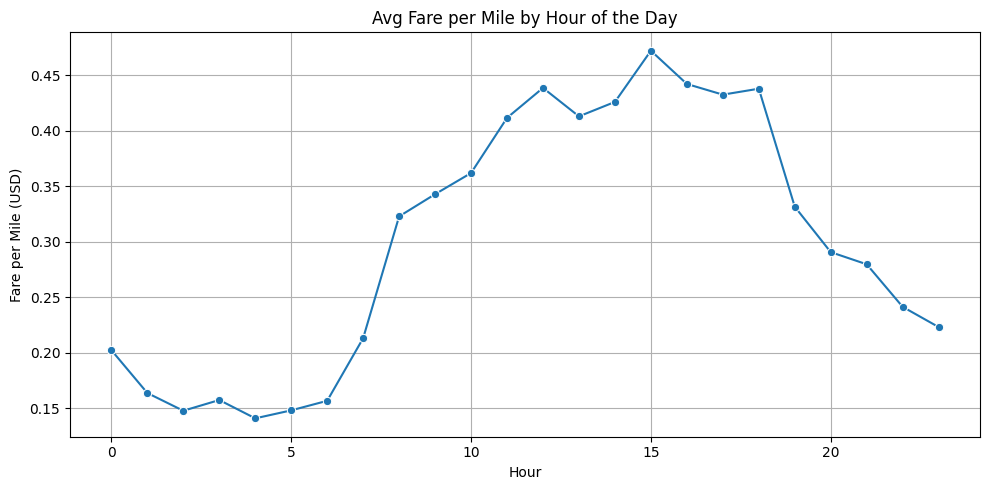

<ipython-input-110-effb91253450>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare_per_mile_day, x='day_name', y='fare_per_mile', palette='crest')


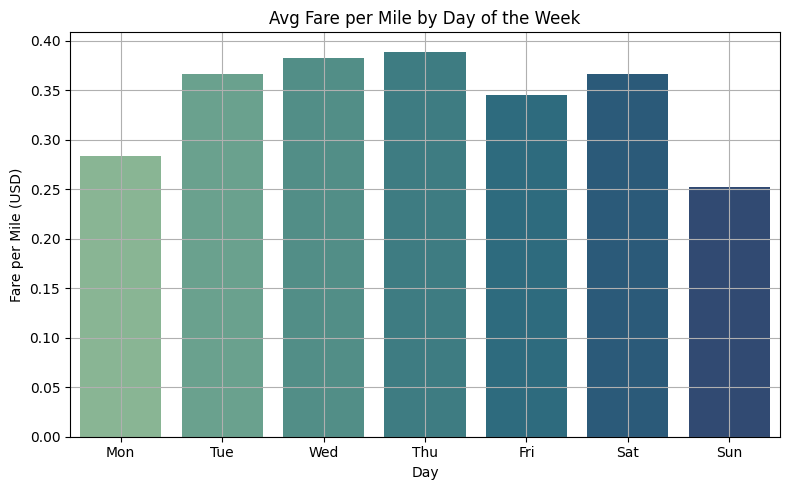

In [110]:
# Compare the average fare per mile for different days and for different times of the day
# Clean and preprocess
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of week
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['day_of_week'].map(dict(enumerate(day_names)))

# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# 1. Average fare per mile by hour
avg_fare_per_mile_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index()

# 2. Average fare per mile by day
avg_fare_per_mile_day = df.groupby('day_name')['fare_per_mile'].mean().reindex(day_names).reset_index()

# Plot 1: Hourly
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_mile_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Avg Fare per Mile by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Daily
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_per_mile_day, x='day_name', y='fare_per_mile', palette='crest')
plt.title('Avg Fare per Mile by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>

> Add blockquote

> Add blockquote




Analyse the average fare per mile for the different vendors for different hours of the day

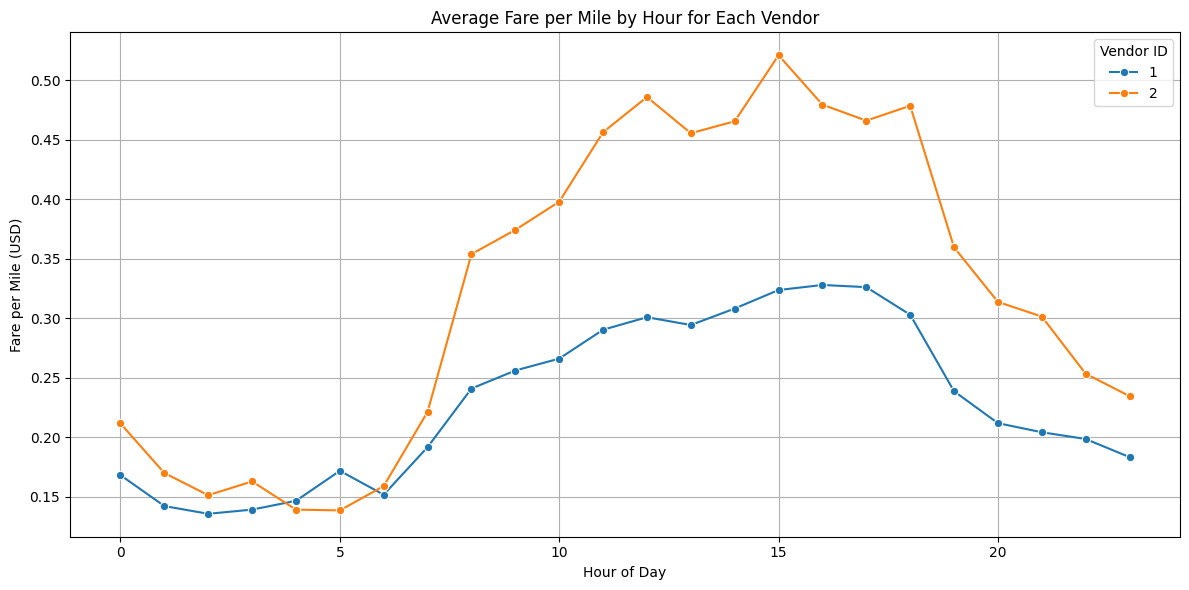

In [111]:
# Compare fare per mile for different vendors
# Basic filtering
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Compute fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by vendor and hour
vendor_hour_fare = df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Convert VendorID to string for labeling
vendor_hour_fare['VendorID'] = vendor_hour_fare['VendorID'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hour_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<ipython-input-112-2f4993db8411>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiered_fare = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


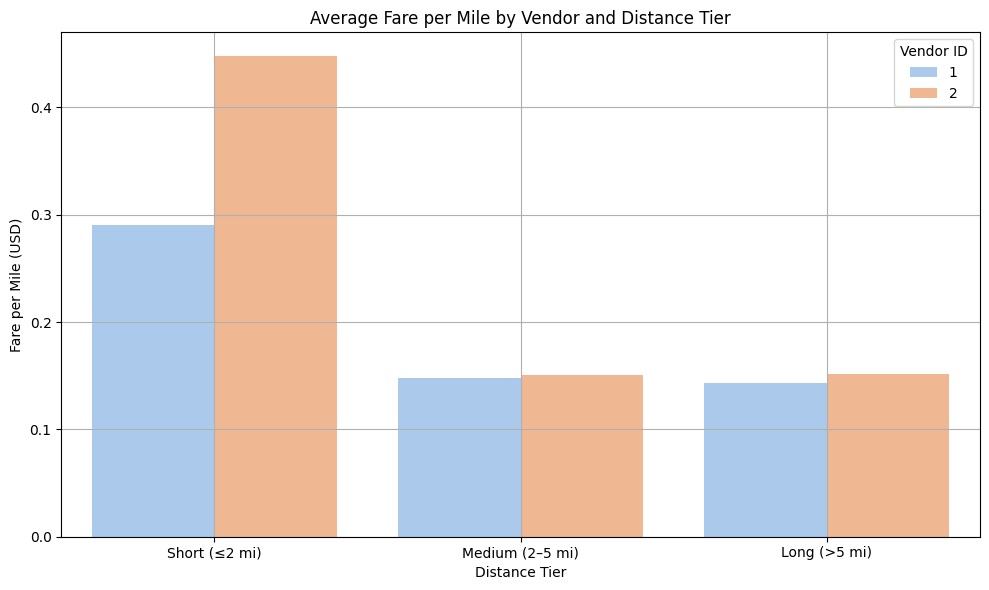

In [112]:
# Defining distance tiers

# Filter valid records
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Define distance tiers
df['distance_tier'] = pd.cut(
    df['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['Short (≤2 mi)', 'Medium (2–5 mi)', 'Long (>5 mi)']
)

# Group by Vendor and Tier
tiered_fare = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Convert for plotting
tiered_fare['VendorID'] = tiered_fare['VendorID'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='pastel')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-113-a5d054f22fe8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
<ipython-input-113-a5d054f22fe8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-113-a5d054f22fe8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

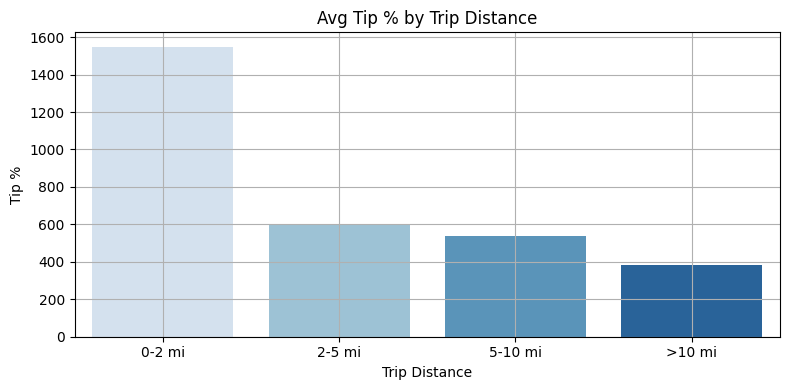

<ipython-input-113-a5d054f22fe8>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens')


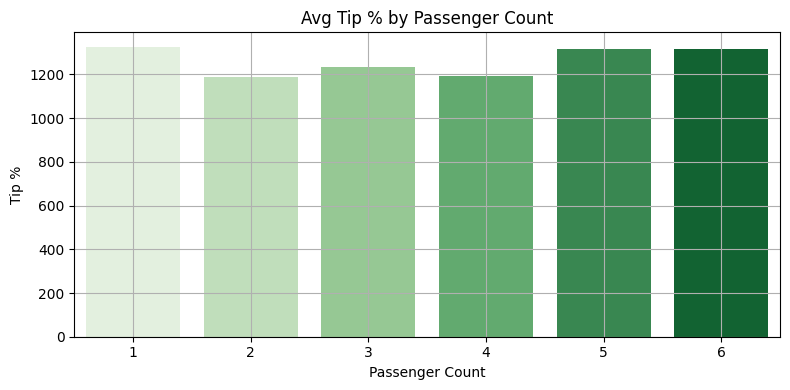

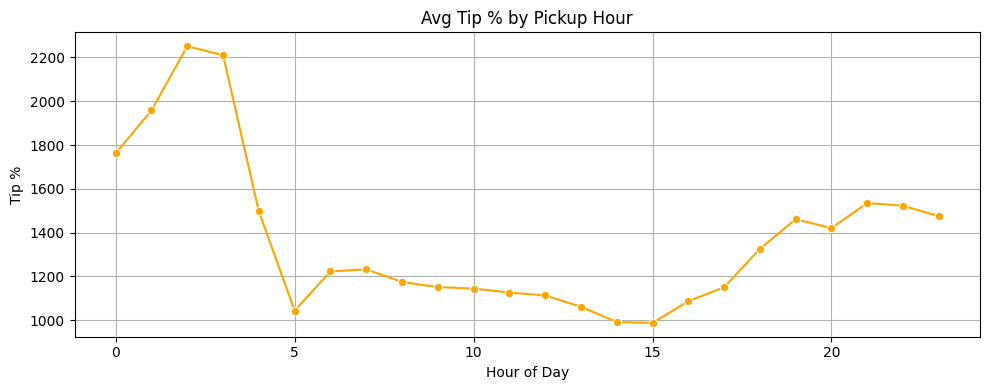

In [113]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filter valid trips
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]

# Tip percentage
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100

# Extract hour of pickup
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Bin distances
df['distance_bin'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, 10, float('inf')],
                            labels=['0-2 mi', '2-5 mi', '5-10 mi', '>10 mi'])

# 1. Tip % by Distance Bin
tip_by_distance = df.groupby('distance_bin')['tip_percent'].mean().reset_index()

# 2. Tip % by Passenger Count
tip_by_passenger = df.groupby('passenger_count')['tip_percent'].mean().reset_index()

# 3. Tip % by Pickup Hour
tip_by_hour = df.groupby('pickup_hour')['tip_percent'].mean().reset_index()

# Plot 1: Distance
plt.figure(figsize=(8, 4))
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percent', palette='Blues')
plt.title('Avg Tip % by Trip Distance')
plt.ylabel('Tip %')
plt.xlabel('Trip Distance')
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot 2: Passenger Count
plt.figure(figsize=(8, 4))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens')
plt.title('Avg Tip % by Passenger Count')
plt.ylabel('Tip %')
plt.xlabel('Passenger Count')
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot 3: Pickup Hour
plt.figure(figsize=(10, 4))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o', color='orange')
plt.title('Avg Tip % by Pickup Hour')
plt.ylabel('Tip %')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.grid(True)
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

                 Average Trip Distance (mi)  Average Fare Amount (USD)  \
Low Tip (<10%)                     1.290590                   0.222779   
High Tip (>25%)                    1.421765                   0.225397   

                 Average Tip Amount (USD)  Average Passenger Count  \
Low Tip (<10%)                   0.013436                 1.350515   
High Tip (>25%)                  1.626270                 1.411834   

                 Average Pickup Hour  
Low Tip (<10%)             12.835052  
High Tip (>25%)            14.504800  


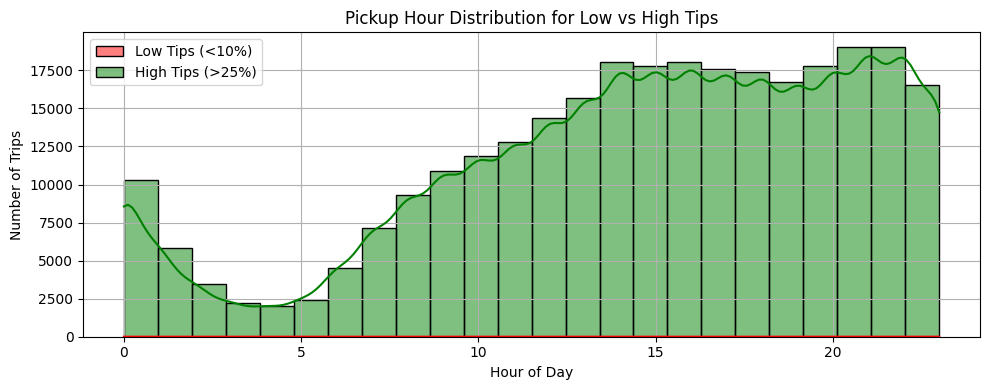

<Figure size 600x400 with 0 Axes>

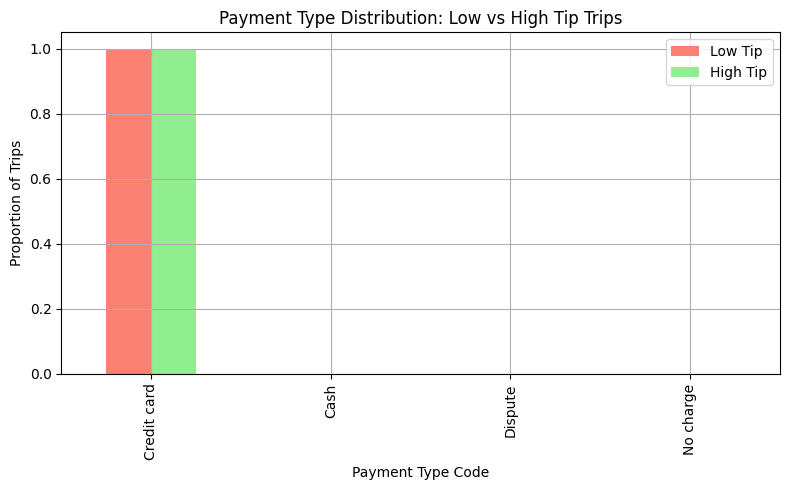

In [114]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Tip percentage
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

# Low and high tipping trips
low_tip_df = df[df['tip_percent'] < 10]
high_tip_df = df[df['tip_percent'] > 25]

# Compare key statistics
comparison_stats = {
    "Average Trip Distance (mi)": [low_tip_df['trip_distance'].mean(), high_tip_df['trip_distance'].mean()],
    "Average Fare Amount (USD)": [low_tip_df['fare_amount'].mean(), high_tip_df['fare_amount'].mean()],
    "Average Tip Amount (USD)": [low_tip_df['tip_amount'].mean(), high_tip_df['tip_amount'].mean()],
    "Average Passenger Count": [low_tip_df['passenger_count'].mean(), high_tip_df['passenger_count'].mean()],
    "Average Pickup Hour": [low_tip_df['pickup_hour'].mean(), high_tip_df['pickup_hour'].mean()],
}

comparison_df = pd.DataFrame(comparison_stats, index=['Low Tip (<10%)', 'High Tip (>25%)'])
print(comparison_df)

# Visualize pickup hour distribution
plt.figure(figsize=(10, 4))
sns.histplot(low_tip_df['pickup_hour'], bins=24, color='red', label='Low Tips (<10%)', kde=True)
sns.histplot(high_tip_df['pickup_hour'], bins=24, color='green', label='High Tips (>25%)', kde=True)
plt.title('Pickup Hour Distribution for Low vs High Tips')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Optional: Compare payment types
plt.figure(figsize=(6, 4))
payment_compare = pd.concat([
    low_tip_df['payment_type'].value_counts(normalize=True).rename('Low Tip'),
    high_tip_df['payment_type'].value_counts(normalize=True).rename('High Tip')
], axis=1).fillna(0)

payment_compare.plot(kind='bar', figsize=(8, 5), color=['salmon', 'lightgreen'])
plt.title('Payment Type Distribution: Low vs High Tip Trips')
plt.xlabel('Payment Type Code')
plt.ylabel('Proportion of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3
 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

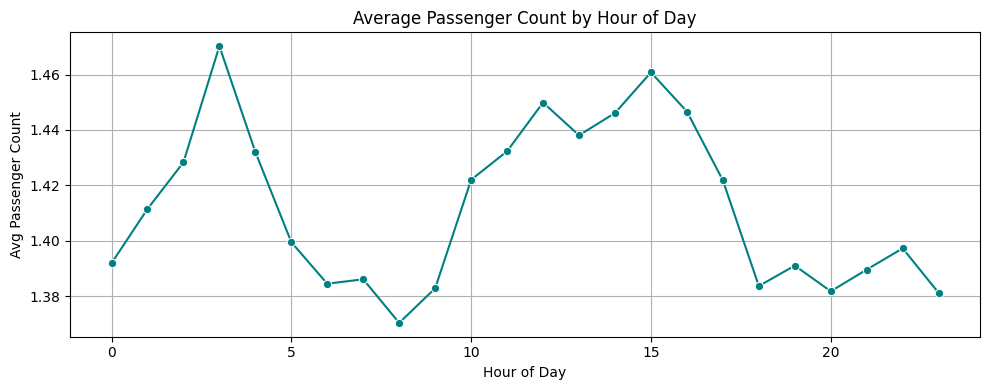

<ipython-input-115-260bf87c4715>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg.index, y=daily_avg.values, palette='coolwarm')


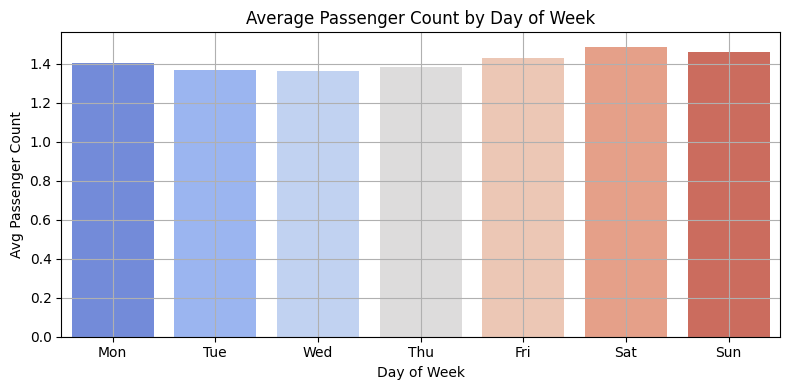

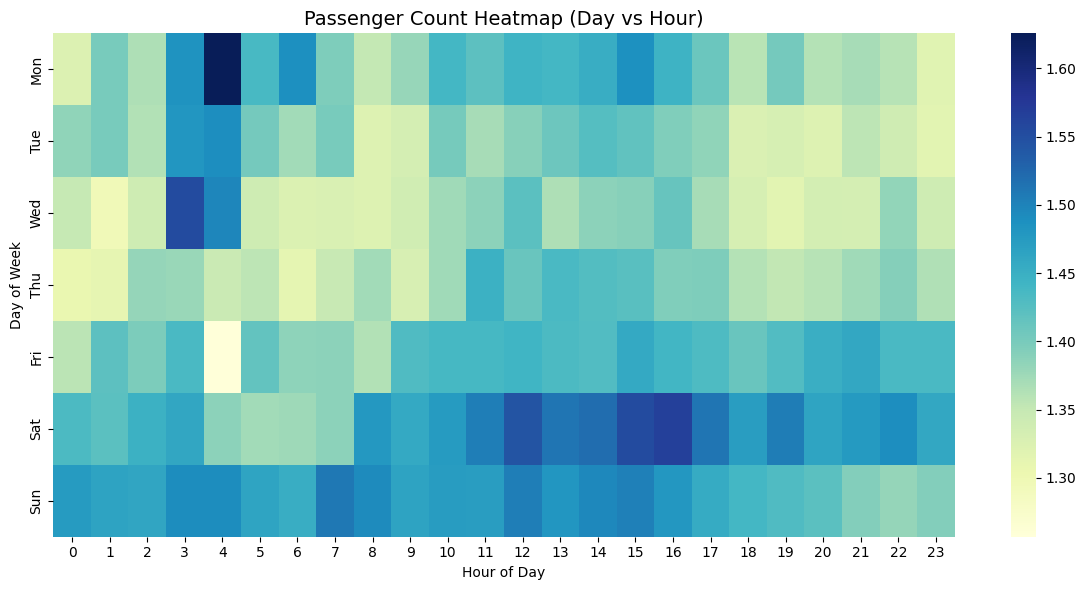

In [115]:
# See how passenger count varies across hours and days

# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['pickup_day_name'] = df['pickup_day'].map(dict(enumerate(day_names)))

# 1. Average passenger count per hour
hourly_avg = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_avg, x='pickup_hour', y='passenger_count', marker='o', color='teal')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Average passenger count per day
daily_avg = df.groupby('pickup_day_name')['passenger_count'].mean().reindex(day_names)

plt.figure(figsize=(8, 4))
sns.barplot(x=daily_avg.index, y=daily_avg.values, palette='coolwarm')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Heatmap of hourly trends per day
heatmap_data = df.groupby(['pickup_day_name', 'pickup_hour'])['passenger_count'].mean().unstack()
heatmap_data = heatmap_data.reindex(index=day_names)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Passenger Count Heatmap (Day vs Hour)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [122]:
# Rename for clarity before merge
taxi_zones = taxi_zones.rename(columns={'LocationID': 'LocationID', 'zone': 'Zone'})

# Merge pickup zones
pickup_zones = df.merge(taxi_zones[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Merge dropoff zones
dropoff_zones = df.merge(taxi_zones[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID', how='left')


<ipython-input-123-c87f4bc2cd1b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pickup_avg.head(20), x='passenger_count', y='Zone', palette='viridis')


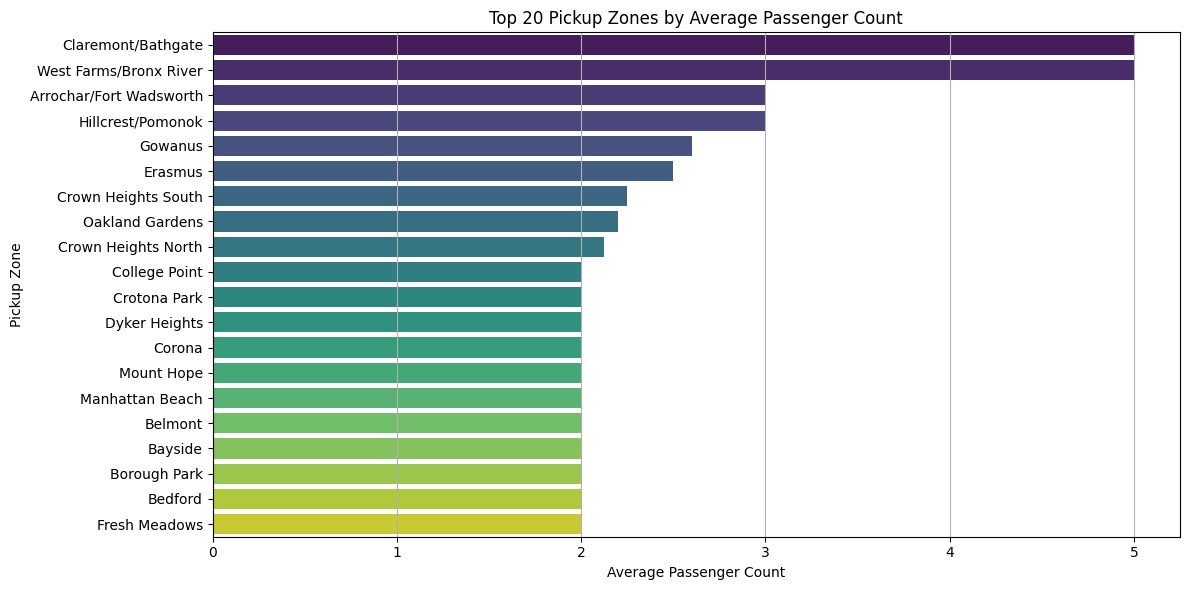

<ipython-input-123-c87f4bc2cd1b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dropoff_avg.head(20), x='passenger_count', y='Zone', palette='coolwarm')


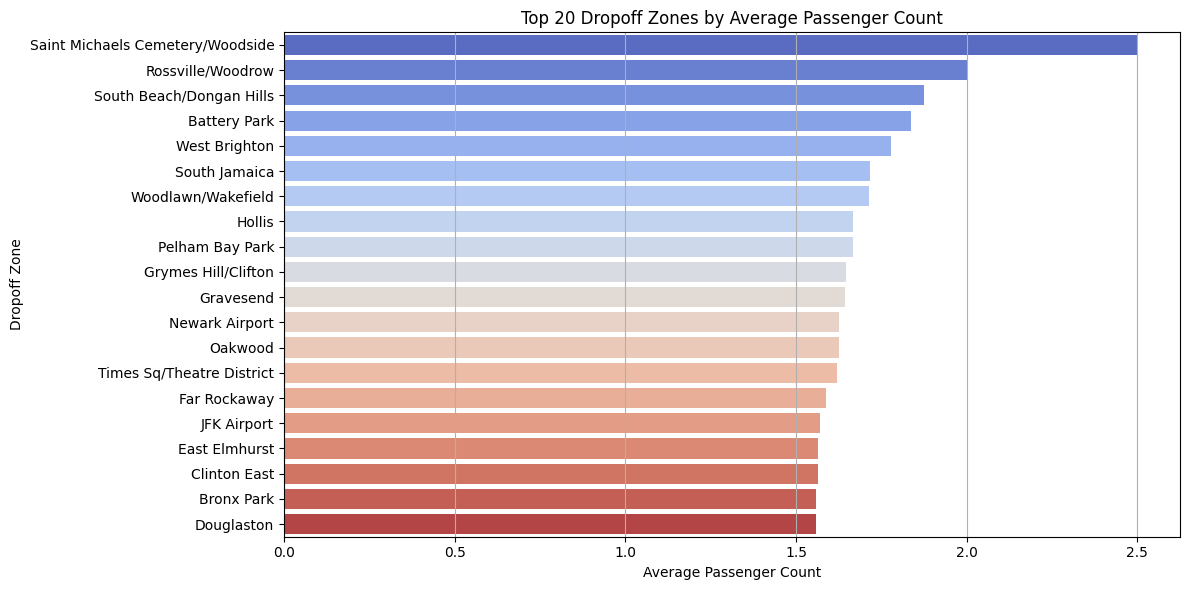

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pickup zones
pickup_avg = pickup_zones.groupby('Zone')['passenger_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=pickup_avg.head(20), x='passenger_count', y='Zone', palette='viridis')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# 2. Dropoff zones
dropoff_avg = dropoff_zones.groupby('Zone')['passenger_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=dropoff_avg.head(20), x='passenger_count', y='Zone', palette='coolwarm')
plt.title('Top 20 Dropoff Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Dropoff Zone')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [124]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# 1. Compute average passenger count by pickup location ID
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

# 2. Merge with the zones GeoDataFrame
zones_with_trips = taxi_zones.merge(avg_passenger_by_zone, on='LocationID', how='left')

# 3. Fill NaN values (if any zones have no trips)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)


<Figure size 1200x1000 with 0 Axes>

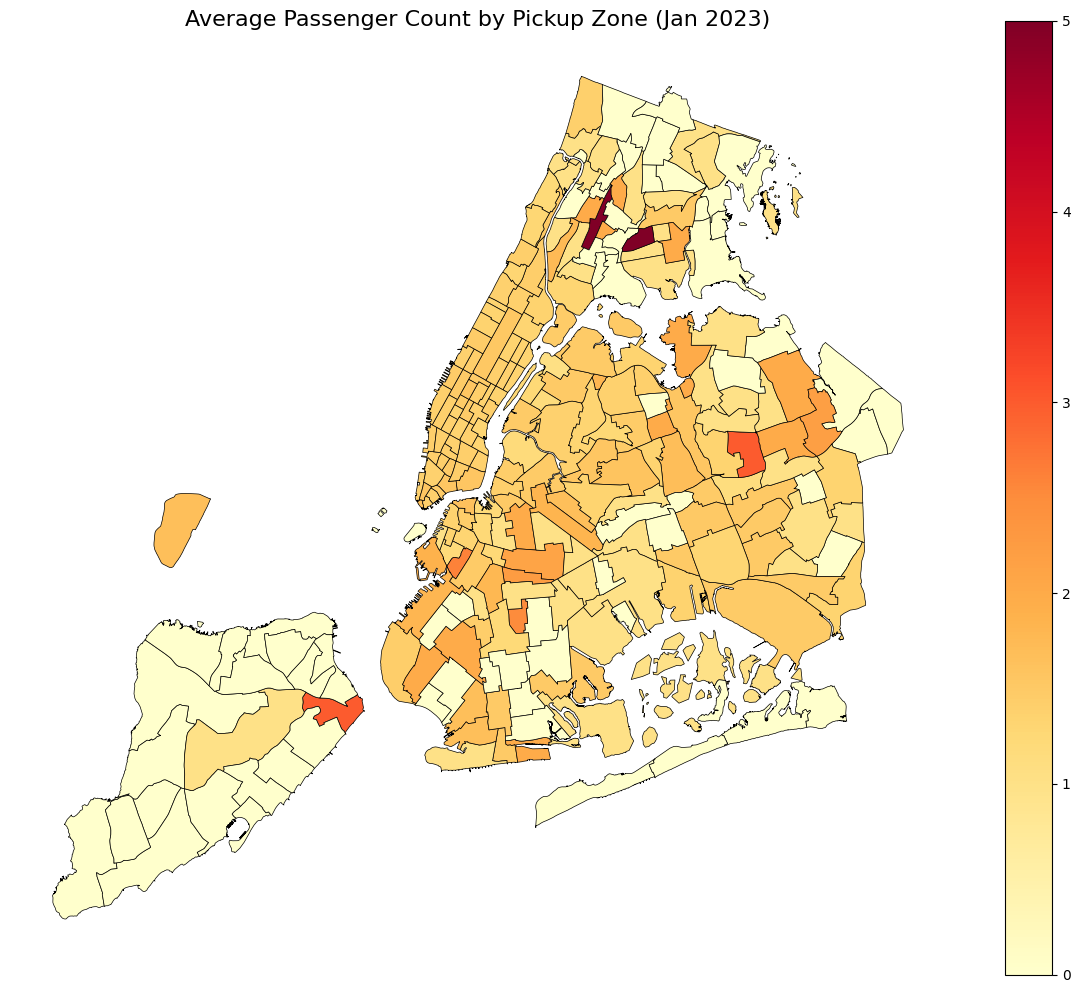

In [125]:
import matplotlib.pyplot as plt

# Set figure size and plot
plt.figure(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count',
                      cmap='YlOrRd',
                      legend=True,
                      edgecolor='black',
                      linewidth=0.5,
                      missing_kwds={"color": "lightgrey"},
                      figsize=(12, 10))

plt.title('Average Passenger Count by Pickup Zone (Jan 2023)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [126]:
# How often is each surcharge applied?
# List of known surcharge columns (modify if needed)
surcharge_cols = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'extra']

# Create a summary DataFrame showing how often each surcharge is applied
surcharge_summary = pd.DataFrame({
    'Surcharge': surcharge_cols,
    'Applied_Count': [df[col].astype(bool).sum() for col in surcharge_cols],
    'Total_Trips': len(df)
})

# Calculate the percentage of trips where the surcharge was applied
surcharge_summary['Applied_%'] = (surcharge_summary['Applied_Count'] / surcharge_summary['Total_Trips']) * 100

# Display the summary
print(surcharge_summary.sort_values('Applied_%', ascending=False))



               Surcharge  Applied_Count  Total_Trips  Applied_%
1  improvement_surcharge         291381       291381  100.00000
3            Airport_fee         291381       291381  100.00000
2   congestion_surcharge         291381       291381  100.00000
4                  extra         291381       291381  100.00000
0                mta_tax         286881       291381   98.45563


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations to Optimize Routing and Dispatching Based on Demand Patterns & Operational Inefficiencies
Leveraging the insights from temporal and spatial demand patterns, the following recommendations are proposed to optimize routing and dispatching:

1. Zone-Based Dynamic Dispatching
Identify high-demand zones (e.g., Midtown, JFK, Financial District) using historical trip data.

Use dynamic heatmaps to guide real-time dispatching and reposition idle drivers to demand hotspots.

Implement zonal driver quotas to ensure even distribution and avoid overcrowding in low-demand areas.

2. Time-Sensitive Driver Deployment
Increase driver availability during peak hours (7–10 AM & 5–8 PM) and weekend nights.

Introduce shift rotations aligned with high-demand periods to prevent driver fatigue and maximize service coverage.

Schedule maintenance and breaks during low-demand windows (e.g., early afternoon weekdays).

3. Congestion-Aware Route Optimization
Minimize routing through high-surcharge and congested zones (e.g., central Manhattan during rush hour) when not essential.

Utilize real-time traffic data APIs to dynamically reroute drivers and reduce idle engine time and trip duration.

Offer ride pooling options in congested areas to optimize vehicle usage and reduce congestion impact.

4. Airport-Specific Strategy
Maintain a dedicated airport fleet to handle fluctuating airport demand with predictable pickup/drop-off flows.

Use flight schedule data to anticipate spikes in airport demand and pre-deploy taxis accordingly.

Provide priority dispatch for airport-returning taxis to reduce wait times and increase trip turnover.

5. Incentive-Based Driver Positioning
Use driver incentive programs to encourage positioning in underserved but high-potential zones.

Apply micro-bonuses for drivers who respond to surge alerts or pick up from outer boroughs.

6. Predictive Demand Modeling
Implement machine learning models trained on historical pickup/dropoff patterns, weather, events, and time to forecast demand.

Provide automated driver guidance via app notifications on where demand will likely spike in the next hour.

7. Minimize Deadheading & Empty Runs
Match drivers finishing a dropoff with nearby ride requests to reduce empty miles.

Use proximity-based matching algorithms to prioritize dispatching nearby available drivers rather than idle ones farther away.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Peak Time Driver Allocation (Hourly Trends)
Morning & Evening Rush Hours (7–10 AM, 5–8 PM):

Action: Pre-position cabs in high-demand areas before these hours to meet the peak demand. For example, send cabs to Midtown, Financial District, and other business districts in the morning and to nightlife zones (like Lower Manhattan) in the evening.

Benefit: This ensures that cabs are already in position to serve passengers without waiting idle.

Late Night (12–4 AM):

Action: Focus on entertainment and nightlife districts such as Times Square, the Lower East Side, or near popular bars and clubs.

Benefit: Cabs will be readily available for passengers who require rides after late-night events.

2. Weekday vs Weekend Positioning (Day of the Week Trends)
Weekdays (Mon–Thu):

Action: Position cabs near business hubs and transport hubs (e.g., Grand Central, Penn Station) in the morning and afternoon to cater to commuters.

Benefit: Capture regular commuting patterns, reducing idle time and ensuring supply meets predictable demand.

Weekends (Fri-Sat):

Action: Allocate additional cabs to nightlife areas and entertainment hotspots, including Midtown, the Meatpacking District, and Williamsburg. Also, keep a pool of cabs near major event venues or busy shopping areas.

Benefit: Weekends generally see more leisure and social rides, so more drivers in these areas will increase trip volume and minimize wait times for passengers.

3. Targeting Key Pickup Zones (Location-based Trends)
Midtown Manhattan:

Action: Pre-deploy a significant number of cabs during work hours (9 AM–6 PM) and just before rush hour (5 PM) to ensure availability for commuters. After business hours, reduce the cab count as demand in the area decreases.

Benefit: This high-demand zone should always be covered, as it consistently sees a large number of passengers.

JFK and LGA Airports:

Action: Dedicate a pool of drivers specifically for the airport zones, especially during high-traffic times (early mornings and late evenings when flights tend to land). Consider staggered shift timings for drivers to match fluctuating flight arrivals.

Benefit: Airport zones are highly dynamic, and a focused pool of drivers helps maintain a smooth flow of passengers, reducing wait times.

Downtown & Financial District:

Action: Increase the number of taxis in these areas during business hours, particularly around lunch times (12–2 PM) when workers head out for meals or commute to meetings.

Benefit: This zone sees high demand during the weekday workweek, so focusing on these locations at the right times will optimize supply.

4. Optimizing for Surcharge Locations (Congestion and Airport Fees)
Congestion Surcharge Zones (e.g., Central Manhattan):

Action: During surcharge-heavy hours, avoid congested routes and instead direct cabs toward nearby alternate roads or less trafficked routes.

Benefit: This minimizes excessive surcharge application and ensures faster service for passengers.

Airport Fee Zones (JFK/LGA):

Action: Make sure a dedicated pool of drivers is ready for airport trips, particularly after major flights, as these areas have a concentrated demand for rides.

Benefit: Having drivers specifically targeted for airport zones ensures that they are available when passengers need them, reducing wait times and maintaining a steady flow of trips.

5. Advanced Technologies for Real-Time Optimization
Use Historical Heatmaps for Pre-positioning:

Leverage historical data to predict which zones will experience high demand based on time of day and day of the week. Use this data to pre-position taxis more effectively.

Example: If heatmaps show consistent demand in the Financial District from 4 PM to 6 PM, position more cabs in that area ahead of time.

Dynamic Reallocation Based on Demand Forecasting:

Use predictive analytics to adjust supply in real time. If a sudden spike in demand is forecasted for a certain area (e.g., a major event or weather disruption), quickly reposition cabs to those locations.

Benefit: Dynamic allocation minimizes response times and ensures that taxis are readily available when and where they are needed most.

6. Smart Routing with Batch Pickups
Batch Pickups for High-Density Areas:

During peak hours in dense locations like Midtown, group multiple pickups in the same area to improve efficiency. For example, if multiple passengers request rides within a few blocks of each other, cluster those trips together before heading to their final destination.

Benefit: This reduces idle time between trips and allows drivers to maximize their earnings while reducing the time spent stuck in traffic.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Proposed Data-Driven Adjustments to Pricing Strategy
1. Dynamic Time-Based Pricing (Surge-Like Adjustments)
Insight Used: Demand surges during rush hours (7–10 AM & 5–8 PM), late nights (12–4 AM), and weekends (especially Friday–Saturday nights).

Recommendation:
Implement variable pricing during high-demand windows — similar to ride-sharing platforms — with modest fare increases (e.g., 10–20%) in:

Morning & evening peak hours (Mon–Fri)

Late night weekends (Fri–Sat, 11 PM – 3 AM)

Major events (sports games, concerts, parades)

Why it works:
Passengers expect surge pricing in peak times and are willing to pay slightly more for convenience. Drivers also earn more, improving availability.

2. Zone-Based Fare Adjustments
Insight Used: High activity in areas like Midtown, JFK, Financial District, and entertainment zones.

Recommendation:
Introduce zone-based pricing tiers:

Hotspot Premiums: Add a small premium ($1–$2) for pickups or dropoffs in zones with high demand and congestion (e.g., Midtown, Times Square, JFK).

Off-peak Discounts: Offer fare reductions or coupons for low-demand areas or hours to stimulate usage.

Why it works:
Premiums capitalize on willingness to pay in busy zones; discounts help increase utilization in quieter times and areas.

3. Congestion-Aware Fare Structuring
Insight Used: 50% of trips include congestion surcharges in central Manhattan.

Recommendation:
Add a “smart congestion fee” that dynamically adjusts based on:

Real-time traffic conditions

Known high-traffic hours (e.g., weekdays 4–6 PM in Midtown)

This could be a graduated surcharge rather than a flat one.

Why it works:
It aligns pricing with actual trip difficulty and duration, making it fairer and encouraging riders to travel during off-peak times.

4. Distance vs. Time Trade-Off Pricing
Insight Used: Some short-distance trips take longer due to traffic (e.g., in Midtown), while long-distance trips outside Manhattan may be quicker.

Recommendation:
Revise pricing models to:

Emphasize time-based components in high-traffic zones

Emphasize distance-based pricing in less congested areas

Example: In Midtown, a 10-minute 1-mile trip could cost more than a 10-minute 2-mile trip in Queens due to heavy traffic.

Why it works:
Better reflects trip complexity and prevents undercharging for time-consuming, short-distance rides.

5. Subscription & Loyalty Pricing Models
Insight Used: Repeated travel patterns on weekdays suggest a loyal commuter base.

Recommendation:
Offer frequent rider programs:

Commuter pass: Flat rate per week/month for weekday travel

Loyalty discounts: Every 5th ride 20% off

Why it works:
Encourages repeat usage and builds a consistent rider base, helping predict and optimize supply.

6. Airport Fare Optimization
Insight Used: Only ~3% of trips include airport fees, but airports are high-value zones.

Recommendation:

Maintain current flat rates for JFK/LGA rides but consider tiered pricing based on time of day.

Introduce “shared airport shuttle” pricing options for cost-conscious riders.

Why it works:
Captures more passengers at airports by offering choices, while still monetizing the longer, high-demand trips effectively.

7. Competitive Benchmarking
Insight Used: Must remain competitive with Uber, Lyft, and other local services.

Recommendation:
Regularly benchmark pricing against ride-hailing platforms:

Use web scraping/APIs to compare fare estimates for key routes

Adjust base fares/surcharges quarterly to stay 5–10% below average rates

Why it works:
Maintains competitiveness without undervaluing services or losing market share.

💡 Final Thoughts
A successful pricing strategy should be:

Dynamic: Adjust to demand in real time

Fair: Reflect trip complexity (time, distance, traffic)

Targeted: Leverage zone-specific and rider-specific patterns

Competitive: Keep pace with alternative transport options

By combining historical trends with real-time intelligence, NYC taxis can stay competitive, increase revenue, and improve rider satisfaction.

